In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# In order to view all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows",None)

In [4]:
# Importing the data and store in variable df
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_data.csv")
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [5]:
# Size of the data
print(df.shape)
print("Number of Rows in the data   :",df.shape[0])
print("Number of columns in the data: ",df.shape[1])

(307511, 122)
Number of Rows in the data   : 307511
Number of columns in the data:  122


In [6]:
# Size of the data
print(df.shape)
print("Number of Rows in the data   :",df.shape[0])
print("Number of columns in the data: ",df.shape[1])

(307511, 122)
Number of Rows in the data   : 307511
Number of columns in the data:  122


In [7]:
df.info(verbose=True)
# dtypes: float64(65), int64(41), object(16)
# there are 65 columns with data type float64
# there are 41 columns with data type int64
# there are 16 columns with data type categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Data Cleaning

In [8]:
## 5 point summary
# Check the summary for the numeric columns
df.describe().round(1)

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count    307511.0  307511.0      307511.0          307511.0    307511.0   
mean     278180.5       0.1           0.4          168797.9    599026.0   
std      102790.2       0.3           0.7          237123.1    402490.8   
min      100002.0       0.0           0.0           25650.0     45000.0   
25%      189145.5       0.0           0.0          112500.0    270000.0   
50%      278202.0       0.0           0.0          147150.0    513531.0   
75%      367142.5       0.0           1.0          202500.0    808650.0   
max      456255.0       1.0          19.0       117000000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count     307499.0         307233.0                    307511.0    307511.0   
mean       27108.6         538396.2                         0.0    -16037.0   
std        14493.7         369446.5                         0.0      4364.0   
min         1615.5          40500.0                         0.0    -25229.0   
25%        16524.0         238500.0                         0.0    -19682.0   
50%        24903.0         450000.0                         0.0    -15750.0   
75%        34596.0         679500.0                         0.0    -12413.0   
max       258025.5        4050000.0                         0.1     -7489.0   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count       307511.0           307511.0         307511.0     104582.0   
mean         63815.0            -4986.1          -2994.2         12.1   
std         141275.8             3522.9           1509.5         11.9   
min         -17912.0           -24672.0          -7197.0          0.0   
25%          -2760.0            -7479.5          -4299.0          5.0   
50%          -1213.0            -4504.0          -3254.0          9.0   
75%           -289.0            -2010.0          -1720.0         15.0   
max         365243.0                0.0              0.0         91.0   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count    307511.0        307511.0         307511.0          307511.0   
mean          1.0             0.8              0.2               1.0   
std           0.0             0.4              0.4               0.0   
min           0.0             0.0              0.0               0.0   
25%           1.0             1.0              0.0               1.0   
50%           1.0             1.0              0.0               1.0   
75%           1.0             1.0              0.0               1.0   
max           1.0             1.0              1.0               1.0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    307511.0    307511.0         307509.0              307511.0   
mean          0.3         0.1              2.2                   2.1   
std           0.4         0.2              0.9                   0.5   
min           0.0         0.0              1.0                   1.0   
25%           0.0         0.0              2.0                   2.0   
50%           0.0         0.0              2.0                   2.0   
75%           1.0         0.0              3.0                   2.0   
max           1.0         1.0             20.0                   3.0   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                     307511.0                 307511.0   
mean                           2.0                     12.1   
std                            0.5                      3.3   
min                            1.0                      0.0   
25%                            2.0                     10.0   
50%                            2.0                     12.0   
75%                            2.0                     14.0   
max                            3.0                     23.0   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                    30751

### Data Cleaning

In [9]:
# Check for missing values in percentage

round(100 * df.isnull().mean(),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL                       0.00
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_MEDI                 69.87
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.76
FLOORSMIN_MEDI                  67.85
LANDAREA_MEDI                   59.38
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAREA_MEDI                 50.19
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAREA_MEDI              55.18
FONDKAPREMONT_MODE              68.39
HOUSETYPE_MODE                  50.18
TOTALAREA_MODE                  48.27
WALLSMATERIAL_MODE              50.84
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUM

In [10]:
# Columns with more then 40 percent null values

col_with_null_40=(df.isnull().sum()*100/df.shape[0])[(df.isnull().sum()*100/df.shape[0])>40]
col_with_null_40.shape # there are 49 columns which have more than 40 % null values

(49,)

In [11]:
# Dropping null values with more than 40 percent of null values
df1=df.drop(columns=col_with_null_40.index)

In [12]:
df1.shape # After removing the columns with more than

(307511, 73)

In [13]:
df1.describe().round(0)

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count    307511.0  307511.0      307511.0          307511.0    307511.0   
mean     278181.0       0.0           0.0          168798.0    599026.0   
std      102790.0       0.0           1.0          237123.0    402491.0   
min      100002.0       0.0           0.0           25650.0     45000.0   
25%      189146.0       0.0           0.0          112500.0    270000.0   
50%      278202.0       0.0           0.0          147150.0    513531.0   
75%      367142.0       0.0           1.0          202500.0    808650.0   
max      456255.0       1.0          19.0       117000000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count     307499.0         307233.0                    307511.0    307511.0   
mean       27109.0         538396.0                         0.0    -16037.0   
std        14494.0         369446.0                         0.0      4364.0   
min         1616.0          40500.0                         0.0    -25229.0   
25%        16524.0         238500.0                         0.0    -19682.0   
50%        24903.0         450000.0                         0.0    -15750.0   
75%        34596.0         679500.0                         0.0    -12413.0   
max       258026.0        4050000.0                         0.0     -7489.0   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
count       307511.0           307511.0         307511.0    307511.0   
mean         63815.0            -4986.0          -2994.0         1.0   
std         141276.0             3523.0           1509.0         0.0   
min         -17912.0           -24672.0          -7197.0         0.0   
25%          -2760.0            -7480.0          -4299.0         1.0   
50%          -1213.0            -4504.0          -3254.0         1.0   
75%           -289.0            -2010.0          -1720.0         1.0   
max         365243.0                0.0              0.0         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
count        307511.0         307511.0          307511.0    307511.0   
mean              1.0              0.0               1.0         0.0   
std               0.0              0.0               0.0         0.0   
min               0.0              0.0               0.0         0.0   
25%               1.0              0.0               1.0         0.0   
50%               1.0              0.0               1.0         0.0   
75%               1.0              0.0               1.0         1.0   
max               1.0              1.0               1.0         1.0   

       FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    307511.0         307509.0              307511.0   
mean          0.0              2.0                   2.0   
std           0.0              1.0                   1.0   
min           0.0              1.0                   1.0   
25%           0.0              2.0                   2.0   
50%           0.0              2.0                   2.0   
75%           0.0              3.0                   2.0   
max           1.0             20.0                   3.0   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                     307511.0                 307511.0   
mean                           2.0                     12.0   
std                            1.0                      3.0   
min                            1.0                      0.0   
25%                            2.0                     10.0   
50%                            2.0                     12.0   
75%                            2.0                     14.0   
max                            3.0                     23.0   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                    307511.0                    307511.0   
mean                          0.0                         0.0   
std              

* CNT_FAM_MEMBERS-Majority of customers are having 3 members in their family
* REGION_RATING_CLIENT-25 % of the customers are living in the region which is having higher risk
* REGION_RATING_CLIENT_W_CITY-on average the client applies loan at noon
* Most of the customers gave their  permanent adress is same as contact adress
* Most of the customers gave their  permanent adress is same as work adress
* Most of the customers contact adress is same as their work adress
* Most of the customers has the registered city is the same as the current living city
* most of the client lives in  city where they work
* most of the customers have higher value in DAYS_LAST_PHONE_CHANGE indicates that the client has had the same phone number for a longer time, potentially indicating stability.
* most of the documents were not provided by the customers
* 4 is the maximun Number of inquiries in the last hour before application.
* most people enquired before 1 year of application
* OBS_30_CNT_SOCIAL_CIRCLE:

* Interpretation: This represents the number of observations of the client's social surroundings with a 30-day past due default (DPD).
* The data suggests that most clients have low to moderate numbers of such observations, with some outliers having significantly more.
* DEF_30_CNT_SOCIAL_CIRCLE:

* Interpretation: This represents how many of the client's social surroundings have defaulted on a 30-day DPD.
### The five-point summary shows that defaults are generally rare, with most clients having no defaults in their social circles.
* OBS_60_CNT_SOCIAL_CIRCLE:

* Interpretation: This captures the number of observations of the client's social surroundings with a 60-day DPD default.
* The distribution seems similar to the 30-day observation count, with a few outliers having a higher number of such observations.
* DEF_60_CNT_SOCIAL_CIRCLE:

* Interpretation: This variable represents defaults on a 60-day DPD within the client's social circle.
* Similar to the 30-day default count, defaults remain rare, with most individuals having zero defaults, but with outliers having up to 24 defaults.

* EXT_SOURCE_2 and EXT_SOURCE_3: These could be external score sources (e.g., credit scores, risk factors, etc.)
* higher score might suggest lower risk, while a lower score might indicate higher risk.
* NAME_CONTRACT_TYPE: Type of contract (e.g., Cash loans, Consumer loans). Most frequent is "Cash loans" (278,232 cases).
* CODE_GENDER: Gender of the client (e.g., F, M). Most frequent is "F" (202,448 cases).
* FLAG_OWN_CAR: Whether the client owns a car (Y/N). Most frequent is "Y" (202,924 cases).
* FLAG_OWN_REALTY: Whether the client owns real estate (Y/N). Most frequent is "Y" (213,312 cases).
* NAME_TYPE_SUITE: Type of suite the client lives in (e.g., Unaccompanied, Family). Most frequent is "Unaccompanied" (248,526 cases).
* NAME_INCOME_TYPE: Type of income (e.g., Working, Commercial associate). Most frequent is "Working" (158,774 cases).
* NAME_EDUCATION_TYPE: Education level (e.g., Secondary / secondary special, Higher education). Most frequent is "Secondary / secondary special" (218,391 cases).
* NAME_FAMILY_STATUS: Family status (e.g., Married, Single / not married). Most frequent is "Married" (196,432 cases).
* NAME_HOUSING_TYPE: Type of housing (e.g., House / apartment, Rented apartment). Most frequent is "House / apartment" (272,868 cases).
* OCCUPATION_TYPE: Type of occupation (e.g., Laborers, Managers). Most frequent is "Laborers" (55,186 cases).
* WEEKDAY_APPR_PROCESS_START: Weekday when application process starts (e.g., Monday, Tuesday). Most frequent is "Tuesday" (53,901 cases).
* ORGANIZATION_TYPE: Type of organization (e.g., Business Entity Type 3, State owned). Most frequent is "Business Entity Type 3" (67,992 cases).
* FONDKAPREMONT_MODE: Fund repair mode (e.g., Reg oper account, Money transfer). Most frequent is "Reg oper account" (73,830 cases).
* HOUSETYPE_MODE: House type (e.g., Block of flats, Detached house). Most frequent is "Block of flats" (150,503 cases).
* WALLSMATERIAL_MODE: Wall material of the house (e.g., Panel, Monolithic). Most frequent is "Panel" (66,040 cases).
* EMERGENCYSTATE_MODE: Emergency state (e.g., No, Yes). Most frequent is "No" (159,428 cases).

In [14]:
# Check for % missing values for remaining columns
round(100 * df1.isnull().sum() / df1.shape[0],2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_13                0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_21                0.00
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
dtype: float64

In [15]:
# We dropped columns with more than 40 percent of null values since imputing this columns will lead to biased dataset
# and will not be able to draw proper insights

# After removing columns we left with 73 columns

# In OCCUPATION_TYPE column we have 31.35 percent of null values and if we impute it with mode dataset will be higly biased so we impute it with unknown

# columns with missing values other than occupation type
AMT_REQ_CREDIT_BUREAU_HOUR	13.50
AMT_REQ_CREDIT_BUREAU_DAY	13.50
AMT_REQ_CREDIT_BUREAU_WEEK	13.50
AMT_REQ_CREDIT_BUREAU_MON	13.50
AMT_REQ_CREDIT_BUREAU_QRT	13.50
AMT_REQ_CREDIT_BUREAU_YEAR	13.50
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE	0.33
DEF_30_CNT_SOCIAL_CIRCLE	0.33
OBS_60_CNT_SOCIAL_CIRCLE	0.33
DEF_60_CNT_SOCIAL_CIRCLE

In [16]:
df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].info()

## these columns are number of inquiries made to credit bureau in the last hour, day, week, month, quarter
## So we need to impute with median since if we impute with mean it takes float value and will not be having any meaning
## we need to make this columns integer from float variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [17]:
columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
  # Impute NaN with median and then convert to integer
  df1[i] = df1[i].fillna(df1[i].median()).astype(int)
df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   AMT_REQ_CREDIT_BUREAU_HOUR  307511 non-null  int64
 1   AMT_REQ_CREDIT_BUREAU_DAY   307511 non-null  int64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  307511 non-null  int64
 3   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  int64
 4   AMT_REQ_CREDIT_BUREAU_QRT   307511 non-null  int64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  307511 non-null  int64
dtypes: int64(6)
memory usage: 14.1 MB


In [18]:
col1=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
     "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
for i in col1:
  df1[i] = df1[i].fillna(df1[i].median()).astype(int)
##  these columns are Number of observations of people in the client's
##   social circle with 30 days past due on defaults it shoul be in integer
## we filled null values with median

In [19]:
df1["EXT_SOURCE_3"].info()
# It likely represents a risk assessment score from a third-party source,
# used to evaluate a client's creditworthiness.

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_3
Non-Null Count   Dtype  
--------------   -----  
246546 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [20]:
df1["EXT_SOURCE_3"].skew()

-0.4093904596160267

In [21]:
#we need to impute it with median since it is skewed so we cant rely on mean

df1["EXT_SOURCE_3"] = df1["EXT_SOURCE_3"].fillna(df1["EXT_SOURCE_3"].median())
df1["EXT_SOURCE_2"] = df1["EXT_SOURCE_2"].fillna(df1["EXT_SOURCE_2"].median())

In [22]:
df1[["AMT_ANNUITY","AMT_GOODS_PRICE","NAME_TYPE_SUITE","OCCUPATION_TYPE","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AMT_ANNUITY             307499 non-null  float64
 1   AMT_GOODS_PRICE         307233 non-null  float64
 2   NAME_TYPE_SUITE         306219 non-null  object 
 3   OCCUPATION_TYPE         211120 non-null  object 
 4   CNT_FAM_MEMBERS         307509 non-null  float64
 5   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
dtypes: float64(4), object(2)
memory usage: 14.1+ MB


In [23]:
for i in ["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"]:
  df1[i] = df1[i].fillna(df1[i].median()) #we need to impute with median since columns are skewed we need to impute it with median
df1["OCCUPATION_TYPE"] = df1["OCCUPATION_TYPE"].fillna("Unknown") # as said earlier we impute this column with unknown
df1["NAME_TYPE_SUITE"] = df1["NAME_TYPE_SUITE"].fillna(df1["NAME_TYPE_SUITE"].mode()[0])# For this column we impute null values with mode

In [24]:
df1.isnull().sum() # Null values are removed and treated

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_21               0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
dtype: int64

## Check for Duplicates

In [25]:
df1.duplicated().sum() #there are no duplicated in the dataset

0

In [26]:
# In these columns we can see the negative values in the DAYS columns

df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -962.858119  
std                826.807226  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [27]:
# We need to convert it into absolute values '
# Make a list of all DAYS columns
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    df1[i] = abs(df1[i])

# Verify the changes
df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.858119  
std                826.807226  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [28]:
df1['CODE_GENDER'].value_counts() # there are 4 records with XNA which is to be treated
df1['CODE_GENDER'] = df1['CODE_GENDER'].replace('XNA',np.nan)

In [29]:
df1['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

In [30]:
df1['CODE_GENDER']=df1['CODE_GENDER'].fillna(df1['CODE_GENDER'].mode()[0])

In [31]:
plt.rcParams["figure.figsize"] = (5, 5)

## Univariate Analysis

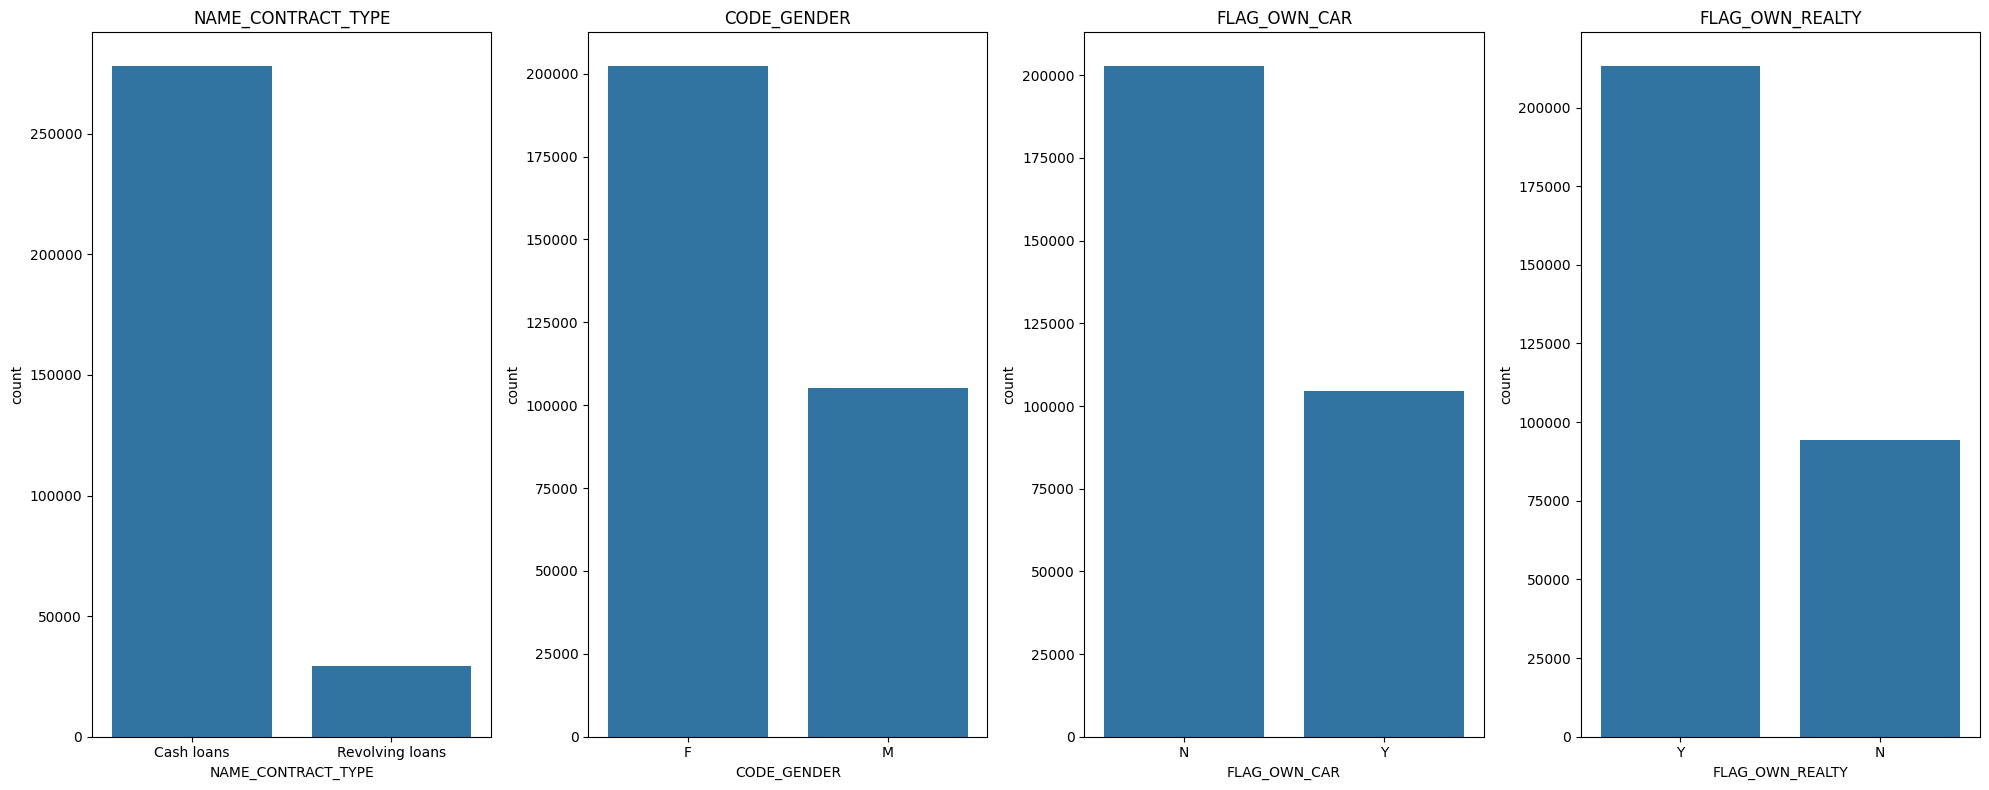

In [32]:
plt.figure(figsize =[20,8])
j=1
for i in df1[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]:
    plt.subplot(1,4,j)
    sns.barplot(df1[i].value_counts())
    plt.title(i)
    plt.xticks(rotation=0)
    j += 1
plt.tight_layout()

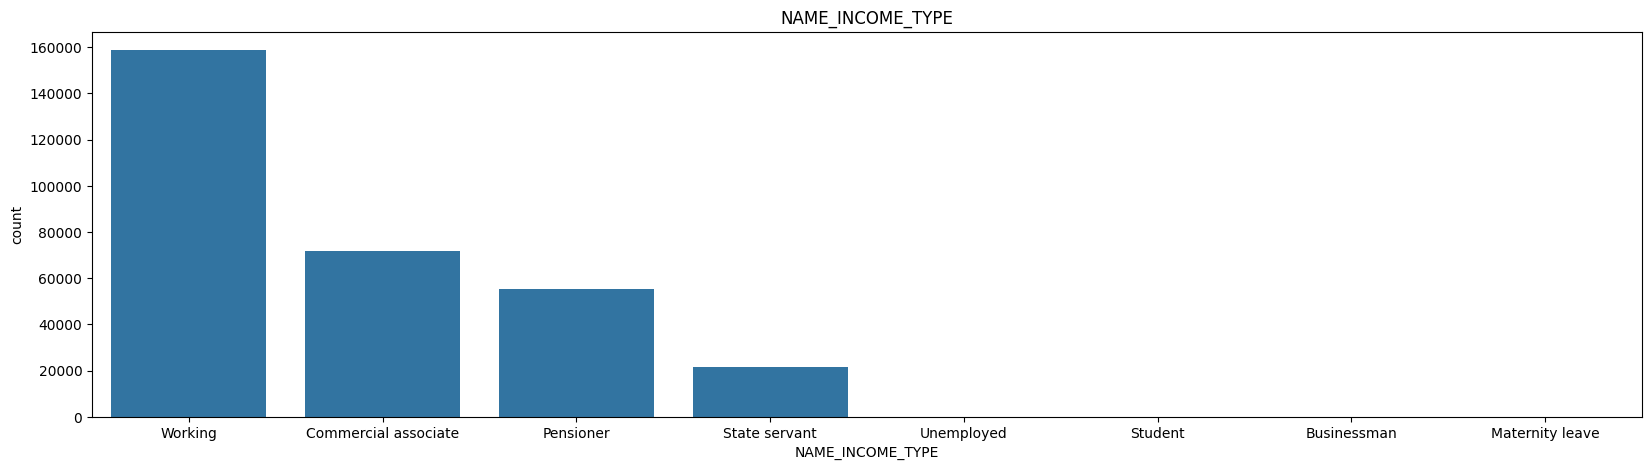

In [33]:
plt.figure(figsize =[20,5])
sns.barplot(df1['NAME_INCOME_TYPE'].value_counts())
plt.title('NAME_INCOME_TYPE')
plt.show()# Most clients income is by working

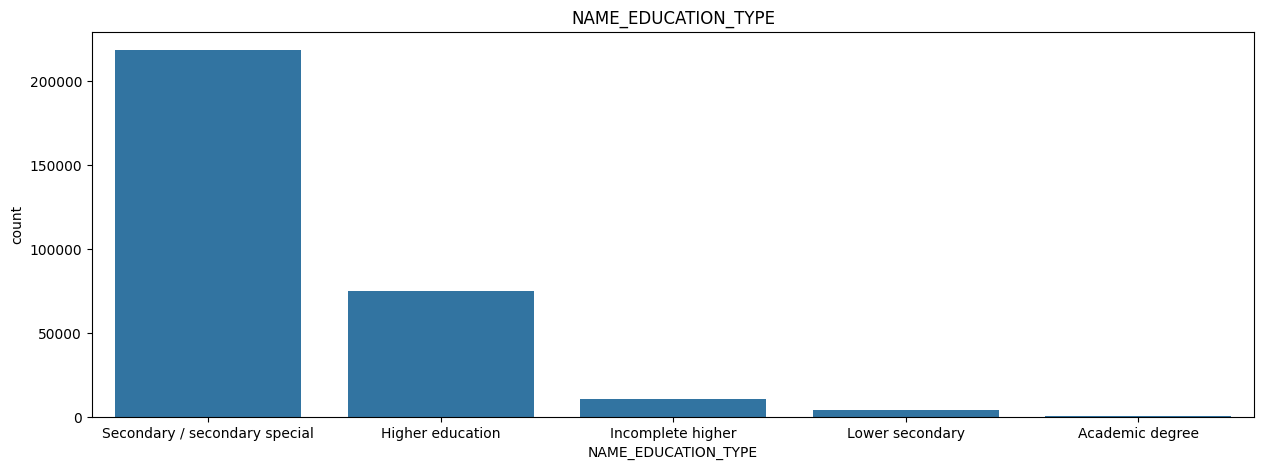

In [34]:
plt.figure(figsize =[15,5])
sns.barplot(df1['NAME_EDUCATION_TYPE'].value_counts())
plt.title('NAME_EDUCATION_TYPE')
plt.show()# Most clients education is secondary

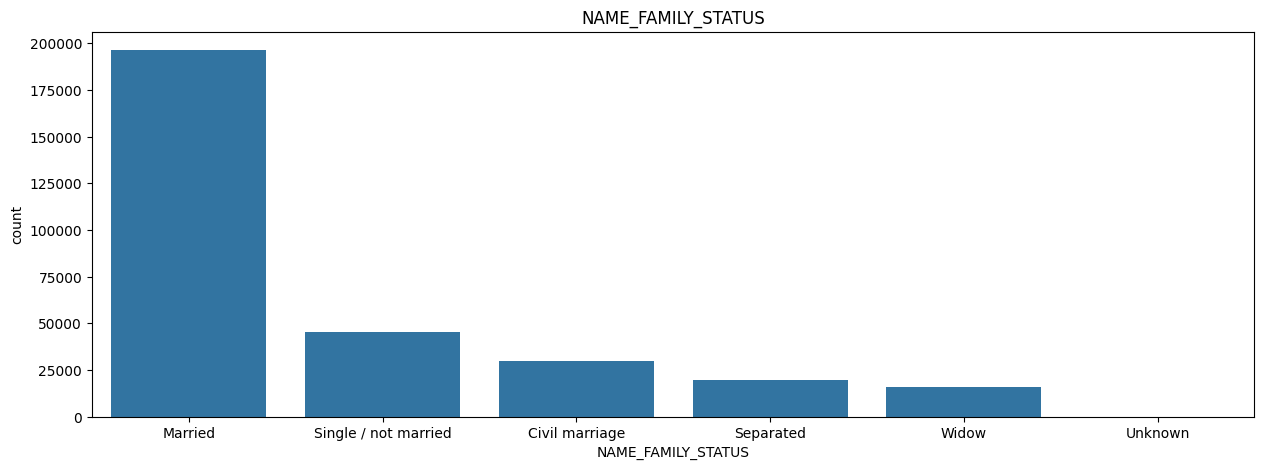

In [35]:
plt.figure(figsize =[15,5])
sns.barplot(df1['NAME_FAMILY_STATUS'].value_counts())
plt.title('NAME_FAMILY_STATUS')
plt.show()# Most clients are married

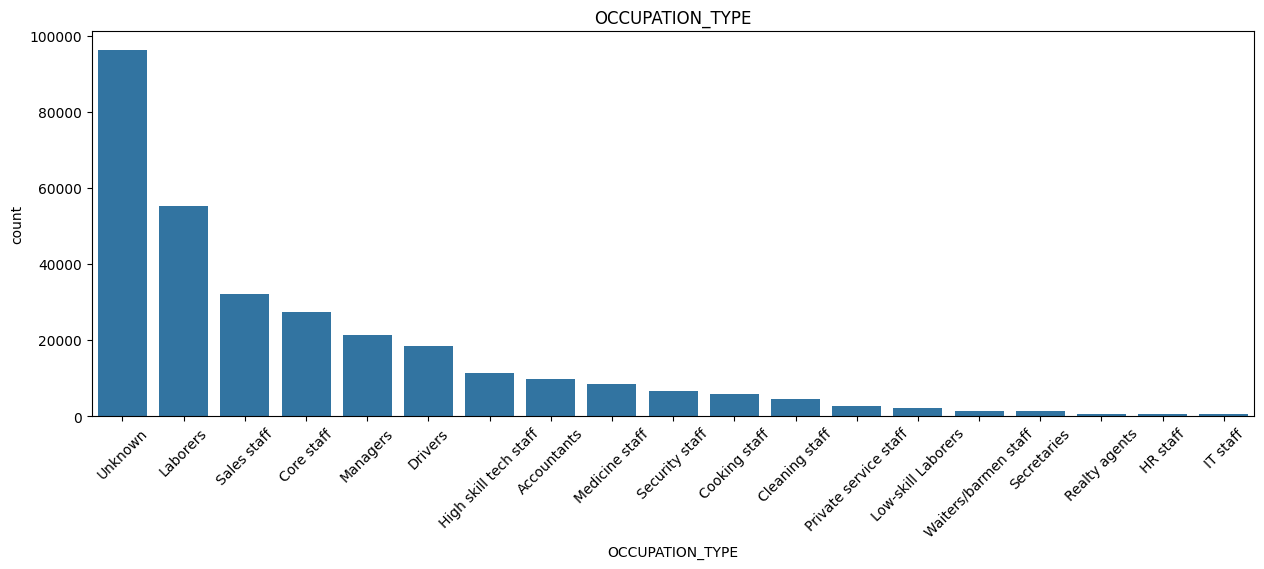

In [36]:
plt.figure(figsize =[15,5])
sns.barplot(df1['OCCUPATION_TYPE'].value_counts())
plt.title('OCCUPATION_TYPE')
plt.xticks(rotation=45)
plt.show()# most clients occupation type is labores

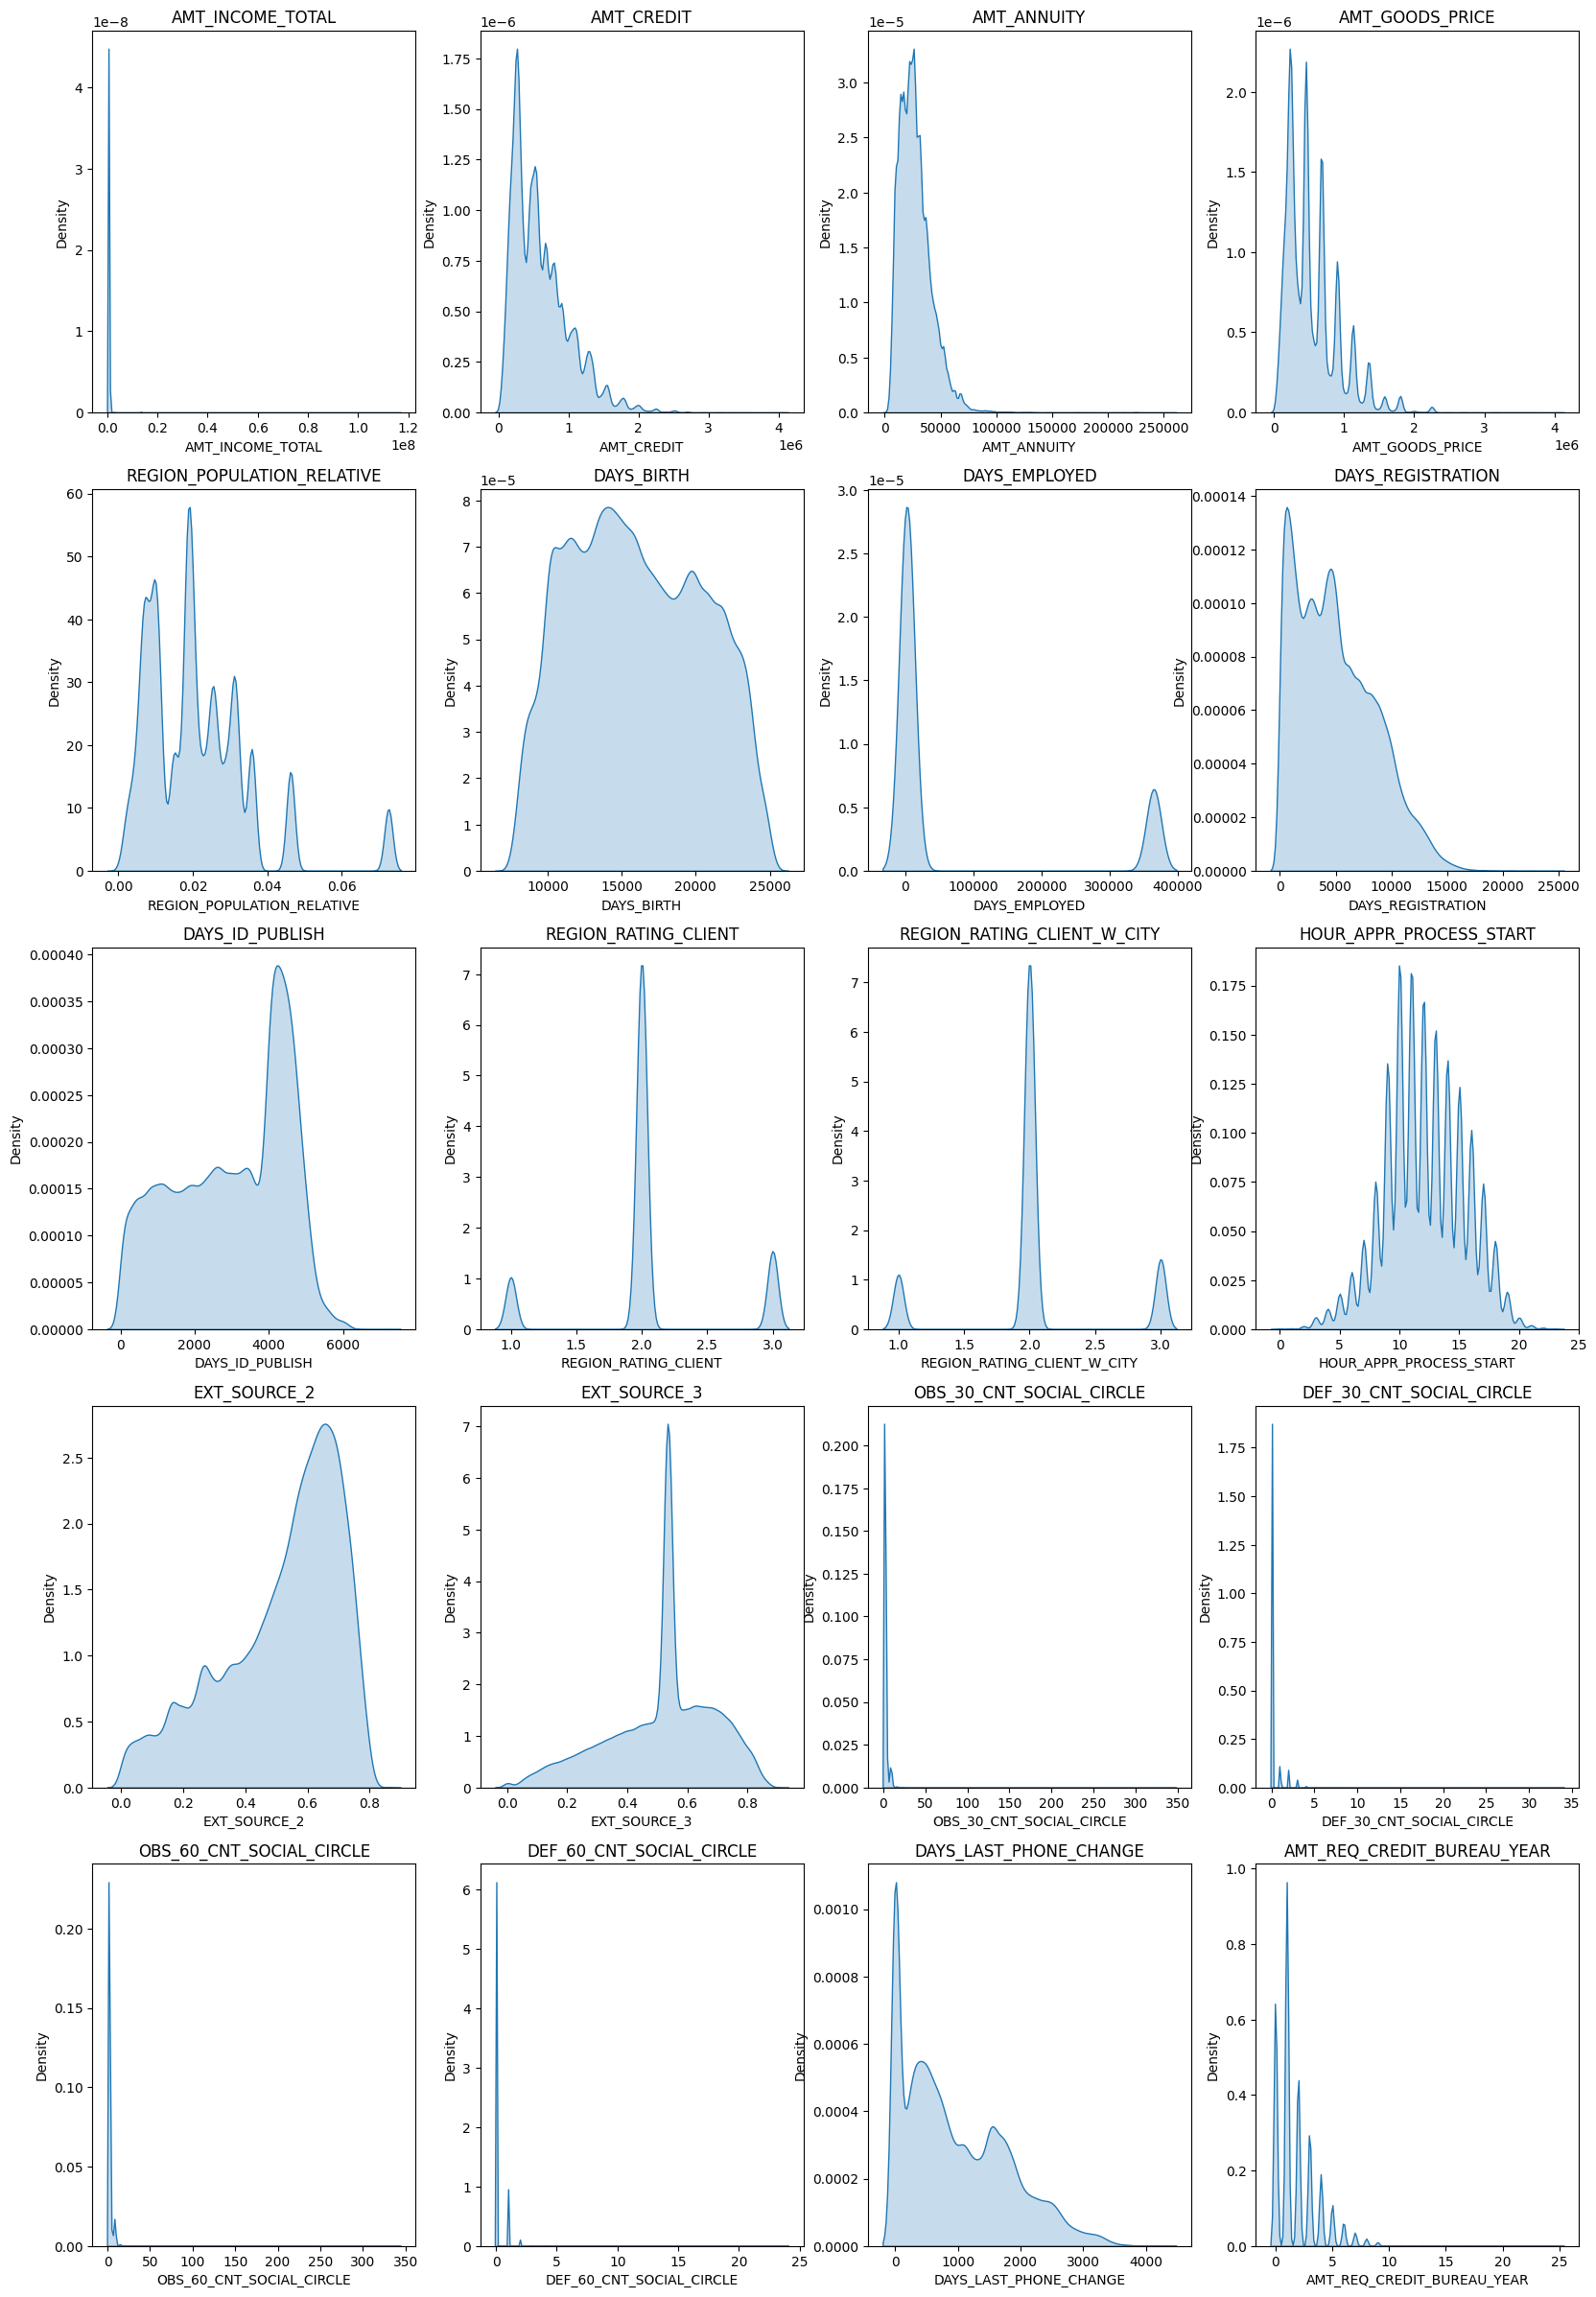

In [37]:
col=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
     "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","REGION_RATING_CLIENT",
     "REGION_RATING_CLIENT_W_CITY",	"HOUR_APPR_PROCESS_START",	"EXT_SOURCE_2",	"EXT_SOURCE_3",
     "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_YEAR"]
plt.figure(figsize =[20,30])
j=1
for i in col:
    plt.subplot(5,4,j)
    sns.kdeplot(df1[i],fill =True)
    plt.title(i)
    j+=1
# 1.AMT_INCOME_TOTAL column has high skewness. There is influence of ouliers here
# 2. "AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE" columns are left skewed
# 3. OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE these columns are skewed highly which indicates of outliers
# 4. remaing columns are having less skewness nearer to zero

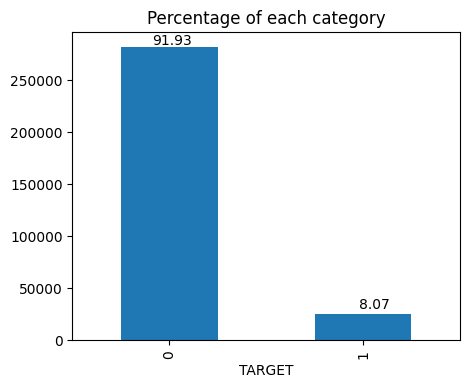

In [38]:
plt.figure(figsize=[5,4])
df1["TARGET"].value_counts().plot(kind="bar",)
plt.text(x=-0.087, y=285000,s=round(df1["TARGET"].value_counts()[0]*100/df1["TARGET"].shape[0],2))
plt.text(x=0.98, y=30000,s=round(df1["TARGET"].value_counts()[1]*100/df1["TARGET"].shape[0],2))
plt.title("Percentage of each category")
plt.show()

# # There is imbalance in the data'
# need to treat imbalance data

## Bivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Females vs Target')

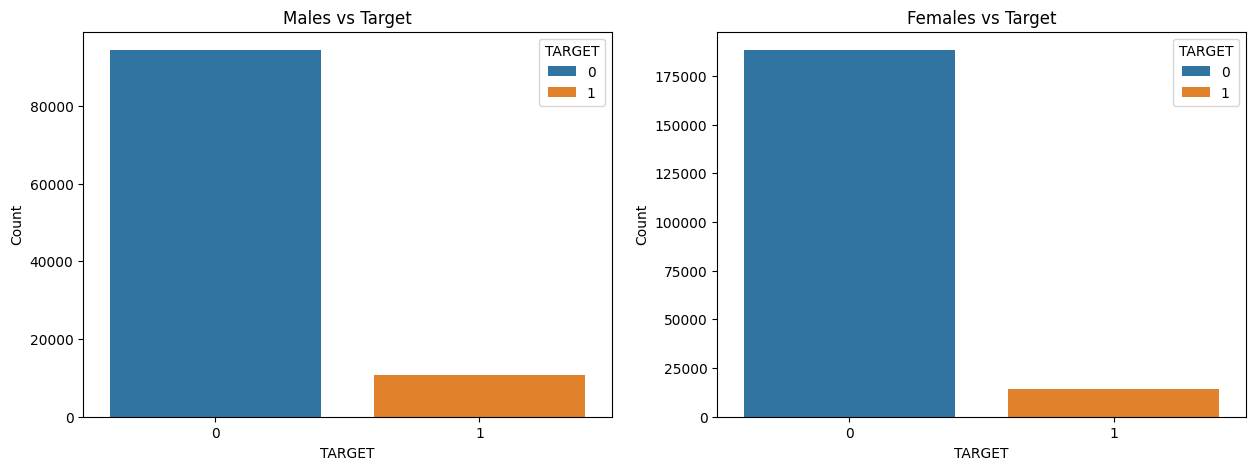

In [39]:
# Code-gender vs Target
import seaborn as sns
import matplotlib.pyplot as plt

# Code-gender vs Target
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
# Create a DataFrame for male data
male_data = df1[df1["CODE_GENDER"] == "M"]["TARGET"].value_counts().reset_index()
male_data.columns = ['TARGET', 'Count']

sns.barplot(x='TARGET', y='Count', data=male_data, hue='TARGET')
plt.title("Males vs Target")

plt.subplot(1, 2, 2)
Female_data = df1[df1["CODE_GENDER"] == "F"]["TARGET"].value_counts().reset_index()
Female_data.columns = ['TARGET', 'Count']
sns.barplot(x='TARGET', y='Count', data=Female_data, hue='TARGET')
plt.title("Females vs Target")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='CODE_GENDER', ylabel='count'>

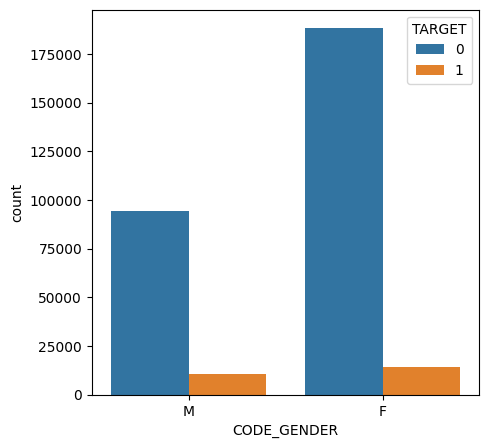

In [40]:
sns.countplot(x="CODE_GENDER",hue="TARGET",data=df1)

<Axes: xlabel='CODE_GENDER', ylabel='count'>

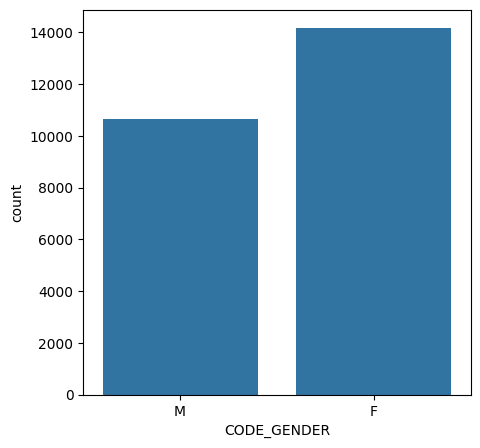

In [115]:
defaults=df1[df1["TARGET"]==1]
others=df1[df1["TARGET"]==0]
sns.countplot(data=defaults,x="CODE_GENDER")

<Axes: xlabel='CODE_GENDER', ylabel='count'>

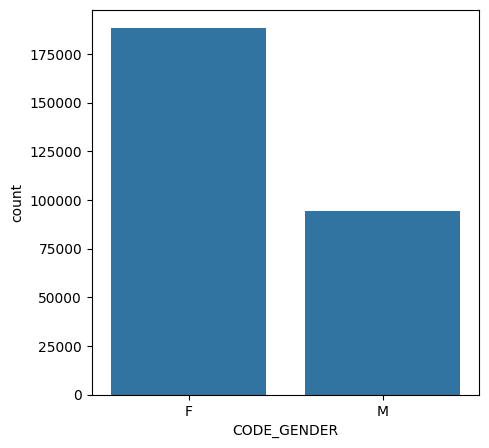

In [117]:
sns.countplot(data=others,x="CODE_GENDER")

In [43]:
import warnings
warnings.filterwarnings("ignore")

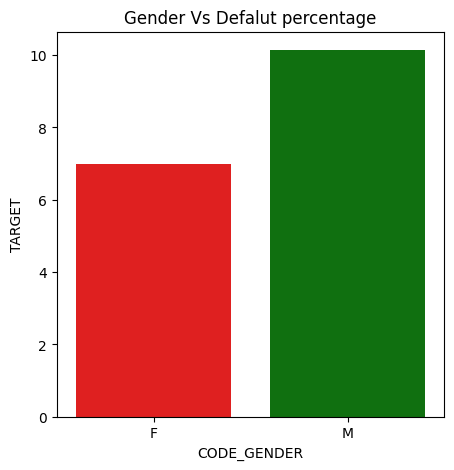

In [116]:
tempdf = df1[["TARGET","CODE_GENDER"]].groupby(["CODE_GENDER"], as_index=False).mean()
tempdf["TARGET"] = tempdf["TARGET"]*100
sns.barplot(x="CODE_GENDER", y = "TARGET", data = tempdf,palette=["r", "g"])
plt.title("Gender Vs Defalut percentage")
plt.show()
#As seen from the above diagram, males have comparatively higher percentage of being defaulters than females.

In [45]:
df1.select_dtypes(include="object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

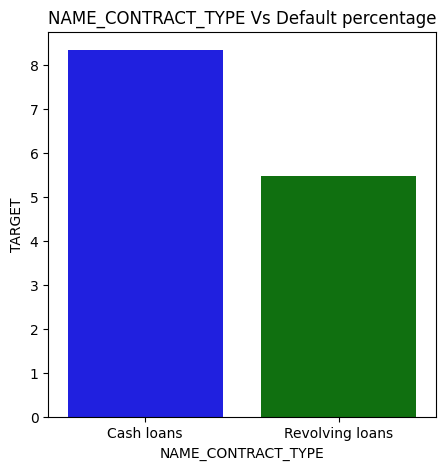

In [46]:
tempdf = df1[["TARGET","NAME_CONTRACT_TYPE"]].groupby(["NAME_CONTRACT_TYPE"], as_index=False).mean()
tempdf["TARGET"] = tempdf["TARGET"]*100
sns.barplot(x="NAME_CONTRACT_TYPE", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("NAME_CONTRACT_TYPE Vs Default percentage")
plt.show()
#As seen from the below diagram, cash loans have comparatively higher percentage of being defaulters than Revovling loans.

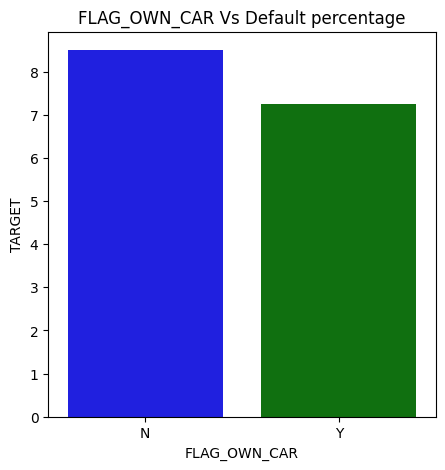

In [47]:
tempdf = df1[["TARGET","FLAG_OWN_CAR"]].groupby(["FLAG_OWN_CAR"], as_index=False).mean()
tempdf["TARGET"] = tempdf["TARGET"]*100
sns.barplot(x="FLAG_OWN_CAR", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("FLAG_OWN_CAR Vs Default percentage")
plt.show()
#As seen from the below diagram, clients with no car have comparatively higher percentage of being defaulters than the clients who have car.

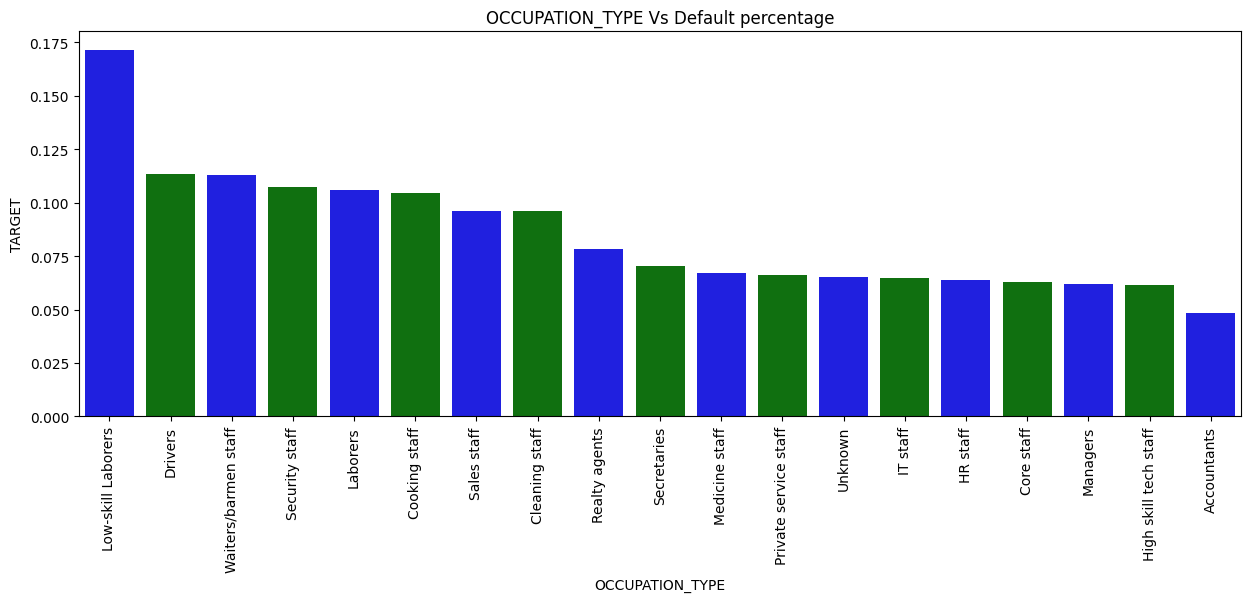

In [48]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","OCCUPATION_TYPE"]].groupby(["OCCUPATION_TYPE"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="OCCUPATION_TYPE", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("OCCUPATION_TYPE Vs Default percentage")
plt.xticks(rotation=90)
plt.show()
#As seen from the below diagram we can say that low skill labors are high chance of being defaulters.

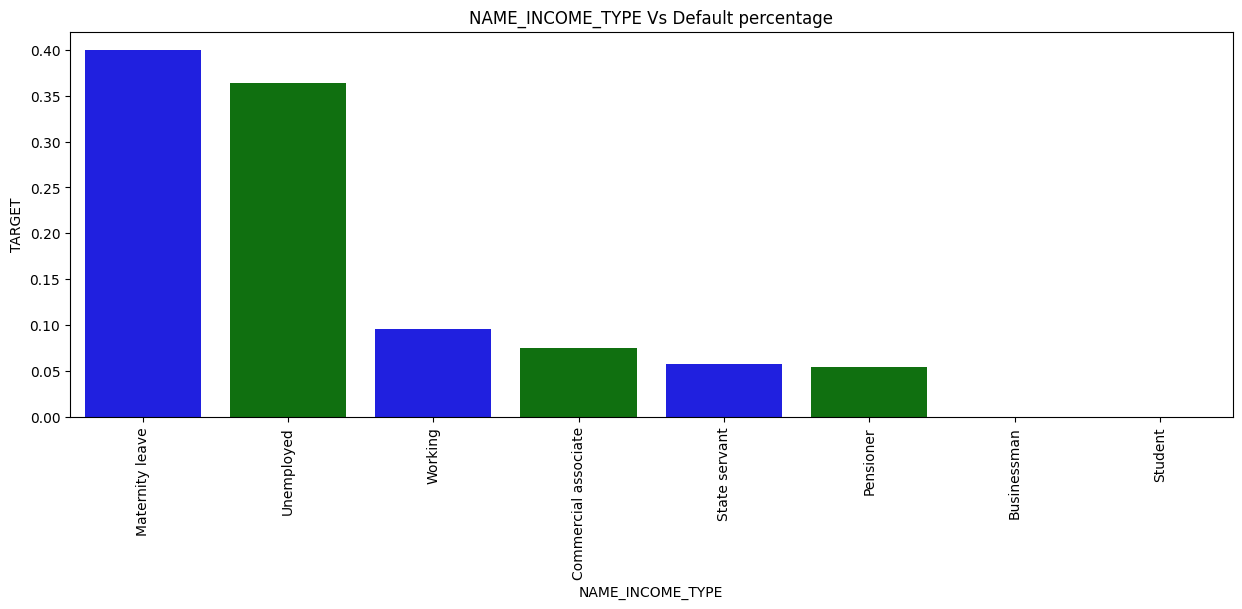

In [49]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","NAME_INCOME_TYPE"]].groupby(["NAME_INCOME_TYPE"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="NAME_INCOME_TYPE", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("NAME_INCOME_TYPE Vs Default percentage")
plt.xticks(rotation=90)
plt.show()
# The people on Maternity leave and unemployed categories are more likely to fail to repay.
# Businessman and Students have the lowest chances of defaulting.

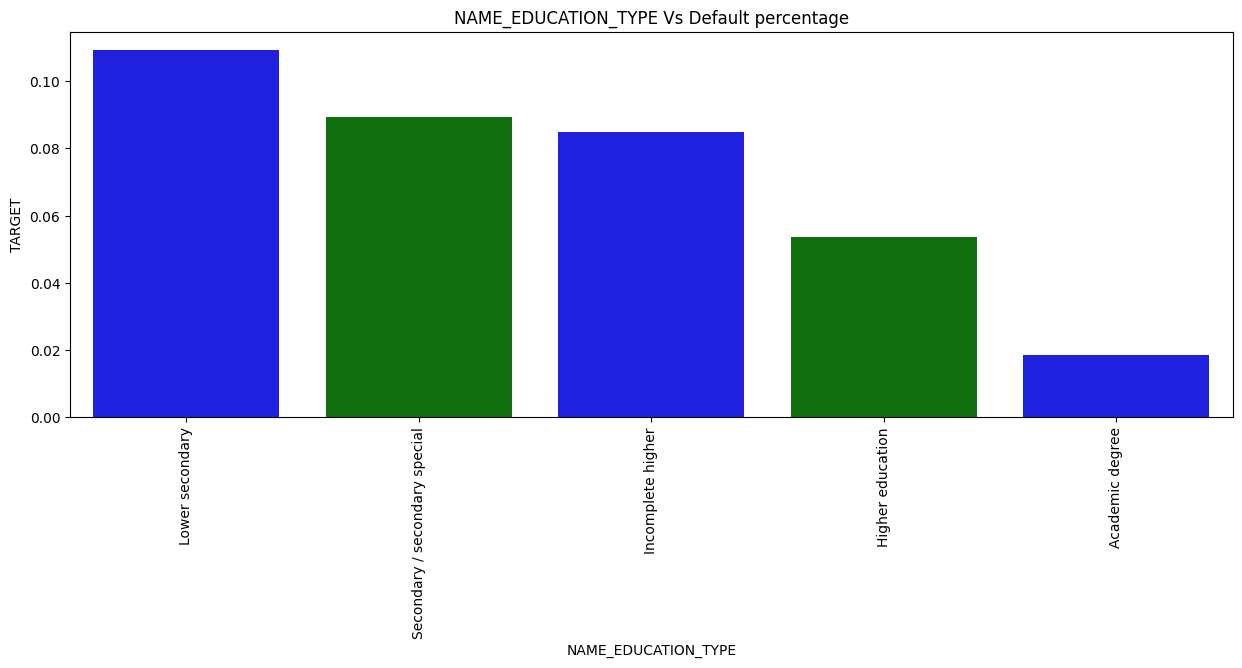

In [50]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","NAME_EDUCATION_TYPE"]].groupby(["NAME_EDUCATION_TYPE"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="NAME_EDUCATION_TYPE", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("NAME_EDUCATION_TYPE Vs Default percentage")
plt.xticks(rotation=90)
plt.show()
# People with lower secondary education level are more likely to fail repayment.
# People with academic degree or higher education, however, are mostly able to repay on time.

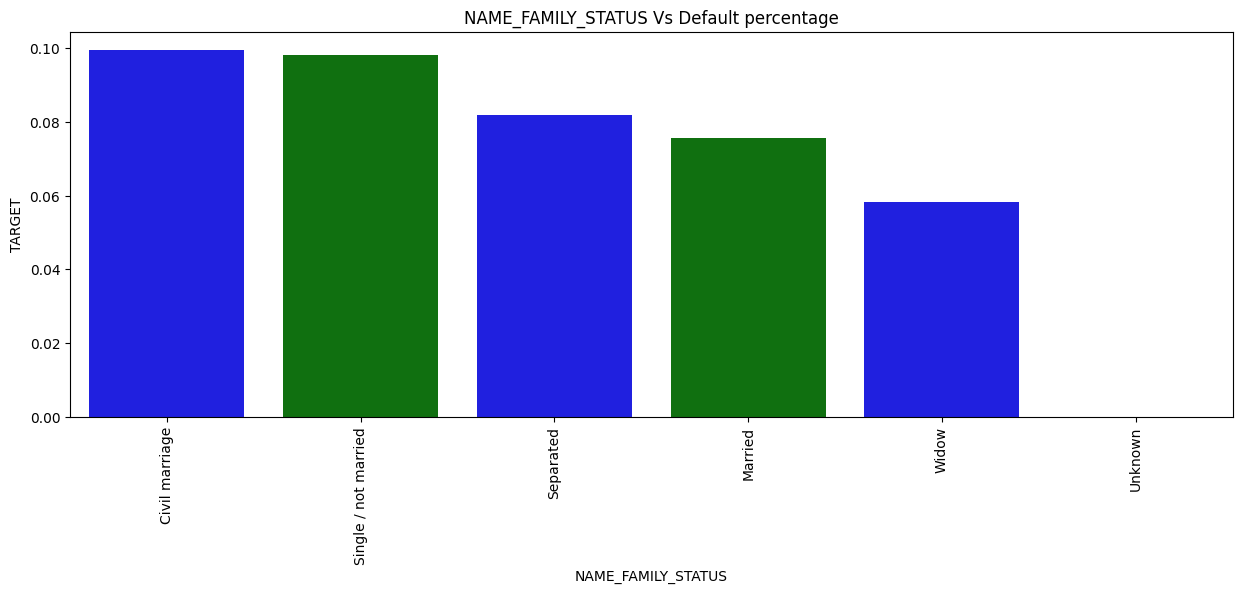

In [51]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","NAME_FAMILY_STATUS"]].groupby(["NAME_FAMILY_STATUS"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="NAME_FAMILY_STATUS", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("NAME_FAMILY_STATUS Vs Default percentage")
plt.xticks(rotation=90)
plt.show()
# People in a civil marriage or those who are singles, are more likely to default.

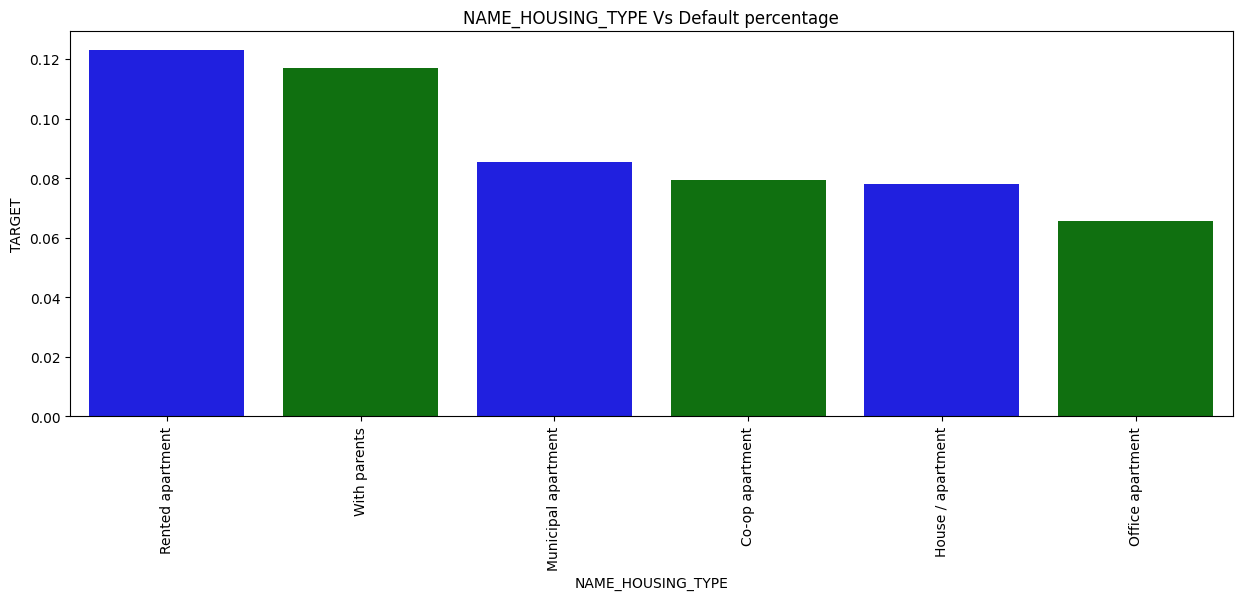

In [52]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","NAME_HOUSING_TYPE"]].groupby(["NAME_HOUSING_TYPE"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="NAME_HOUSING_TYPE", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("NAME_HOUSING_TYPE Vs Default percentage")
plt.xticks(rotation=90)
plt.show()
#Most of the applicants who are likely to default are either staying in a rented apartment or with parents compared to other housing types

In [53]:
bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
df1['INCOME_GROUP'] = pd.cut(df1['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )

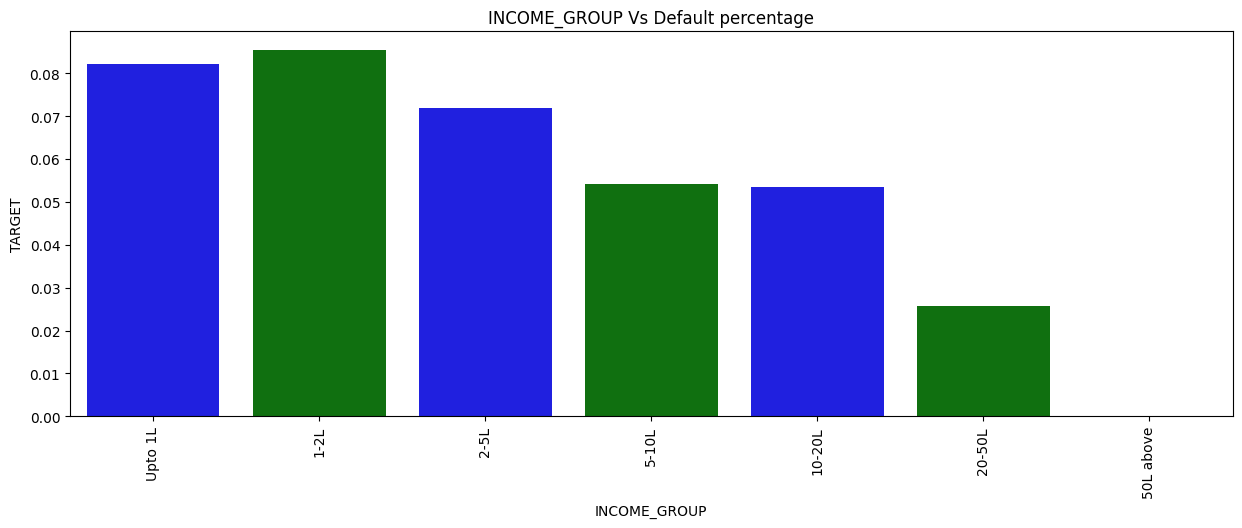

In [54]:
plt.figure(figsize=[15, 5])
tempdf = df1[["TARGET","INCOME_GROUP"]].groupby(["INCOME_GROUP"], as_index=False).mean()
tempdf.sort_values(by="TARGET", ascending=False, inplace=True)
sns.barplot(x="INCOME_GROUP", y = "TARGET", data = tempdf,palette=["b", "g"])
plt.title("INCOME_GROUP Vs Default percentage")
plt.xticks(rotation=90)
plt.show()

In [55]:
## Clients having less income are high likely defaulters

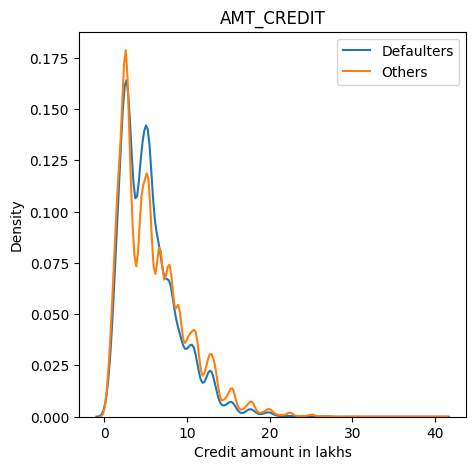

In [56]:
c1=df1[df1["TARGET"]==1]["AMT_CREDIT"]/100000
c2=df1[df1["TARGET"]==0]["AMT_CREDIT"]/100000
sns.kdeplot(c1 , label='Defaulters')
sns.kdeplot(c2 , label='Others')
plt.title("AMT_CREDIT")
plt.xlabel('Credit amount in lakhs')
plt.legend()
plt.show()

In [57]:
#Most of the loans are given with credit amount less than 10 lakhs.

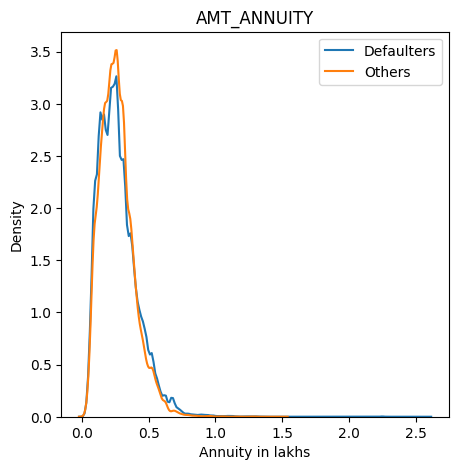

In [58]:
c1=df1[df1["TARGET"]==0]["AMT_ANNUITY"]/100000
c2=df1[df1["TARGET"]==1]["AMT_ANNUITY"]/100000
sns.kdeplot(c1 , label='Defaulters')
sns.kdeplot(c2 , label='Others')
plt.title("AMT_ANNUITY")
plt.xlabel('Annuity in lakhs')
plt.legend()
plt.show()
#Most of the loan annuity is less than 75, 000.

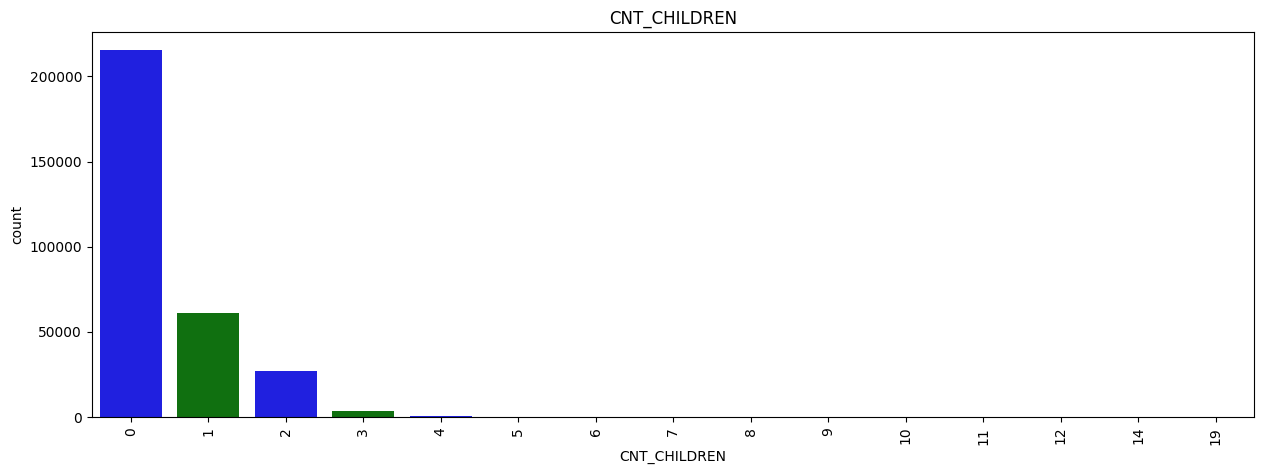

In [59]:
plt.figure(figsize=[15, 5])
sns.countplot(x="CNT_CHILDREN", data = df1,palette=["b", "g"])
plt.title("CNT_CHILDREN")
plt.xticks(rotation=90)
plt.show()
#Majority of the applicants are having no children. Mostly they have 3 or less children.

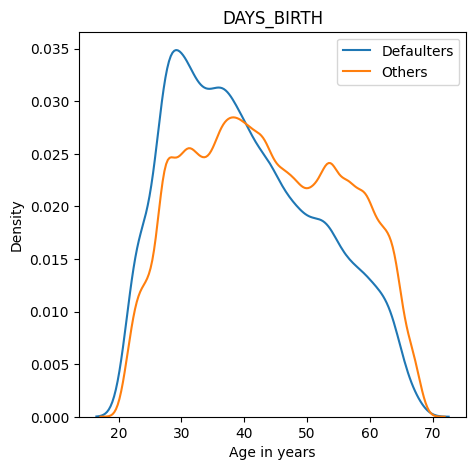

In [108]:
col1 = df1[df1["TARGET"]==1]['DAYS_BIRTH']//365
col2 = df1[df1["TARGET"]==0]['DAYS_BIRTH']//365

sns.kdeplot(col1 , label='Defaulters')
sns.kdeplot(col2 , label='Others')
plt.title("DAYS_BIRTH")
plt.xlabel('Age in years')
plt.legend()
plt.show()

In [61]:
#Defaulters are more in 25-40 age group. Above 40, the number of defaulters tends to decrease.

## Bivariate Analysis

In [109]:
defaults=df1[df1["TARGET"]==1]
others=df1[df1["TARGET"]==0]


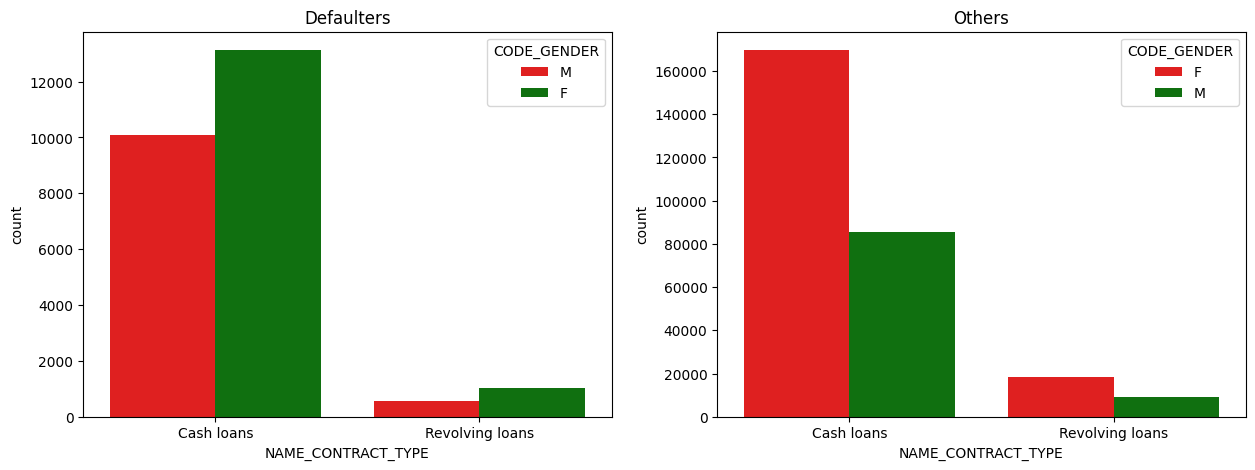

In [112]:
# NAME_CONTRACT_TYPE - CODE_GENDER
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.countplot(data=defaults,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER",palette=("red","green"))
plt.title("Defaulters")
plt.subplot(1,2,2)
sns.countplot(data=others,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER",palette=("red","green"))
plt.title("Others")
plt.show()

In [64]:
# Most of the applications have applied for cash loans.
# Female applicants are more than males.

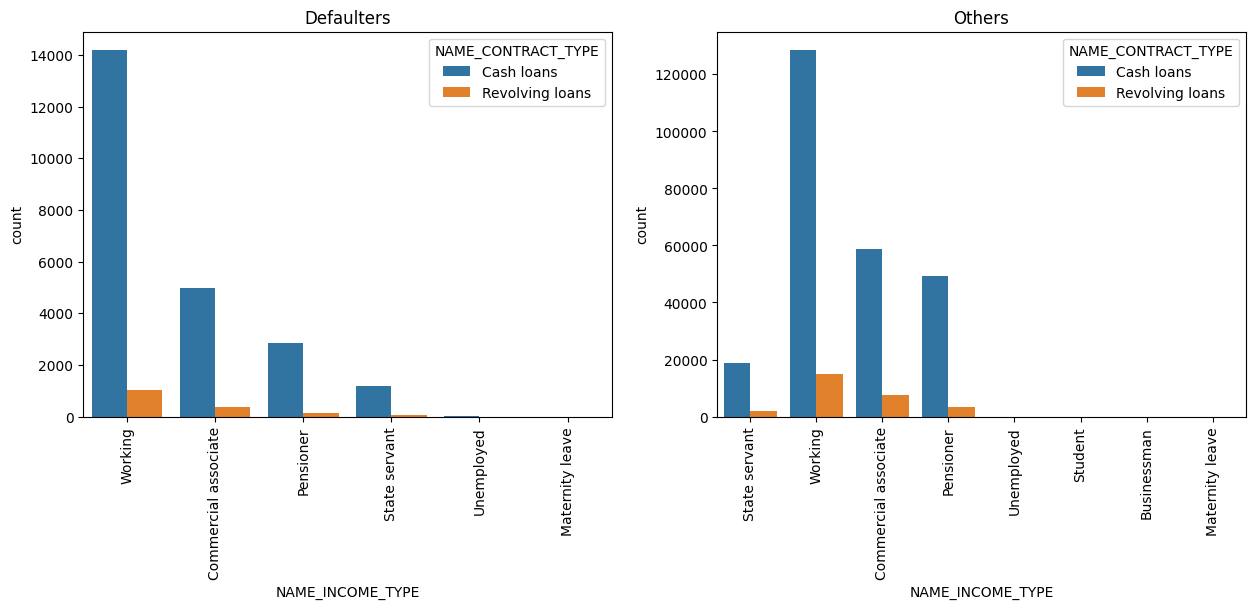

In [113]:
#NAME_INCOME_TYPE - NAME_CONTRACT_TYPE
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.countplot(data=defaults,x="NAME_INCOME_TYPE",hue="NAME_CONTRACT_TYPE")
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data=others,x="NAME_INCOME_TYPE",hue="NAME_CONTRACT_TYPE")
plt.title("Others")
plt.xticks(rotation=90)
plt.show()

* Across income types, cash loan seems to be the popular contract type.
* Most of the people who have taken loans are working class and they have taken cash loans mostly compared to revolving loans.
* People who have taken cash loans are likely to default as well

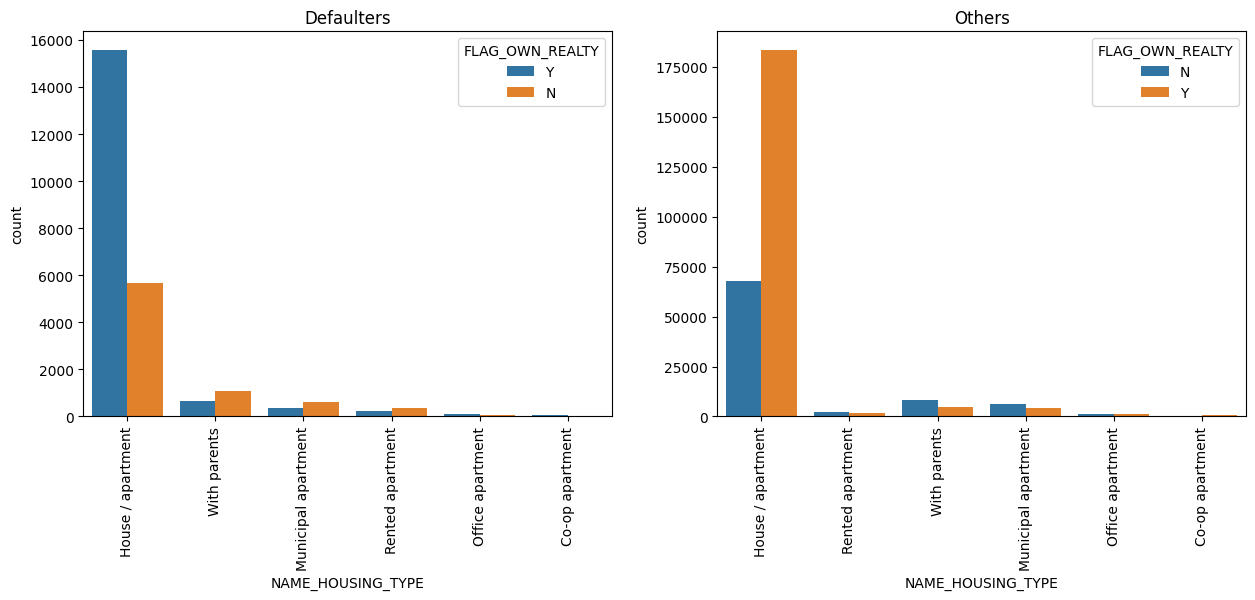

In [114]:
# NAME_HOUSING_TYPE - FLAG_OWN_REALTY

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.countplot(data=defaults,x="NAME_HOUSING_TYPE",hue="FLAG_OWN_REALTY")
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data=others,x="NAME_HOUSING_TYPE",hue="FLAG_OWN_REALTY")
plt.title("Others")
plt.xticks(rotation=90)
plt.show()

* People who own a house/flat and are staying in own property are likely to make repayments.

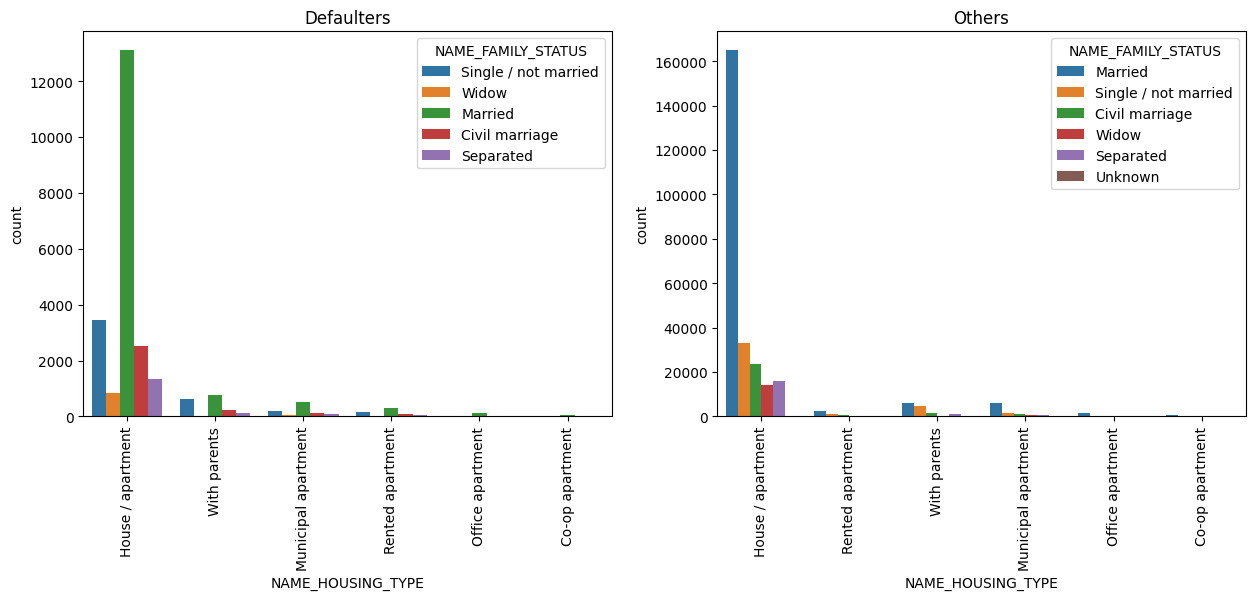

In [67]:
# NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sns.countplot(data=defaults,x="NAME_HOUSING_TYPE",hue="NAME_FAMILY_STATUS")
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data=others,x="NAME_HOUSING_TYPE",hue="NAME_FAMILY_STATUS",)
plt.title("Others")
plt.xticks(rotation=90)
plt.show()

* Married loan applicants are mostly staying in house/apartment.
* Married people staying in house/apartments are the group with maximum number of loan applications.
* Single and civil marriage applicants are more likely to default.

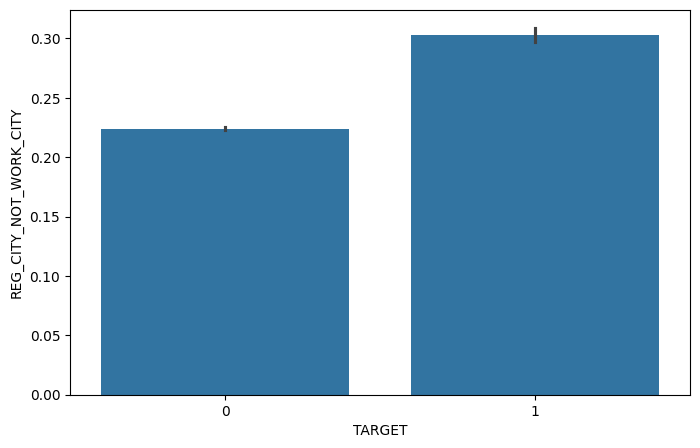

In [68]:
plt.figure(figsize=[8,5])
sns.barplot(data=df1,y='REG_CITY_NOT_WORK_CITY',x="TARGET")
plt.show()

# Number of people who have reg city differnet from their work city has more defaulters than non defaulters.

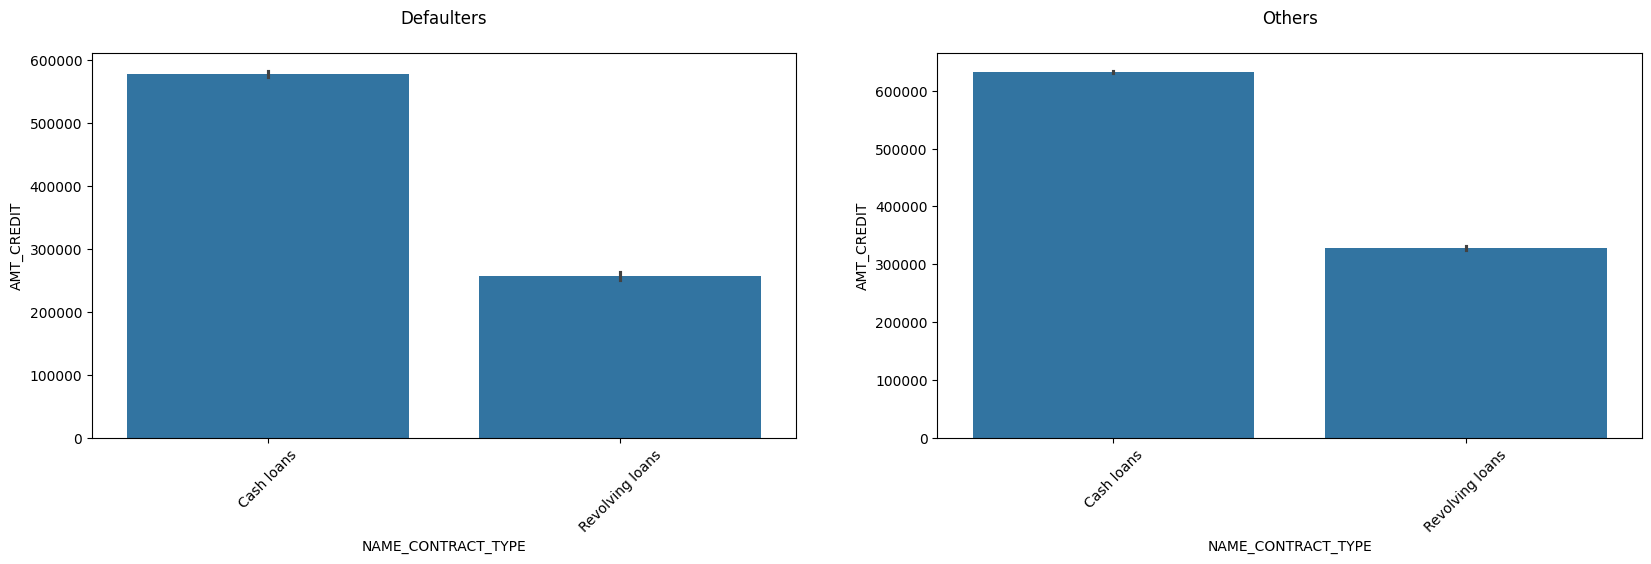

In [69]:
# NAME_CONTRACT_TYPE - AMT_CREDIT
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulters\n')
sns.barplot(x="NAME_CONTRACT_TYPE",y="AMT_CREDIT", data=defaults)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Others\n')
sns.barplot(x="NAME_CONTRACT_TYPE",y="AMT_CREDIT", data=others)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation=45)
plt.show()

In [70]:
# Loan credit amount for cash loan is higher than that of revolving loans.
# Cash loan is favourite among all genders.

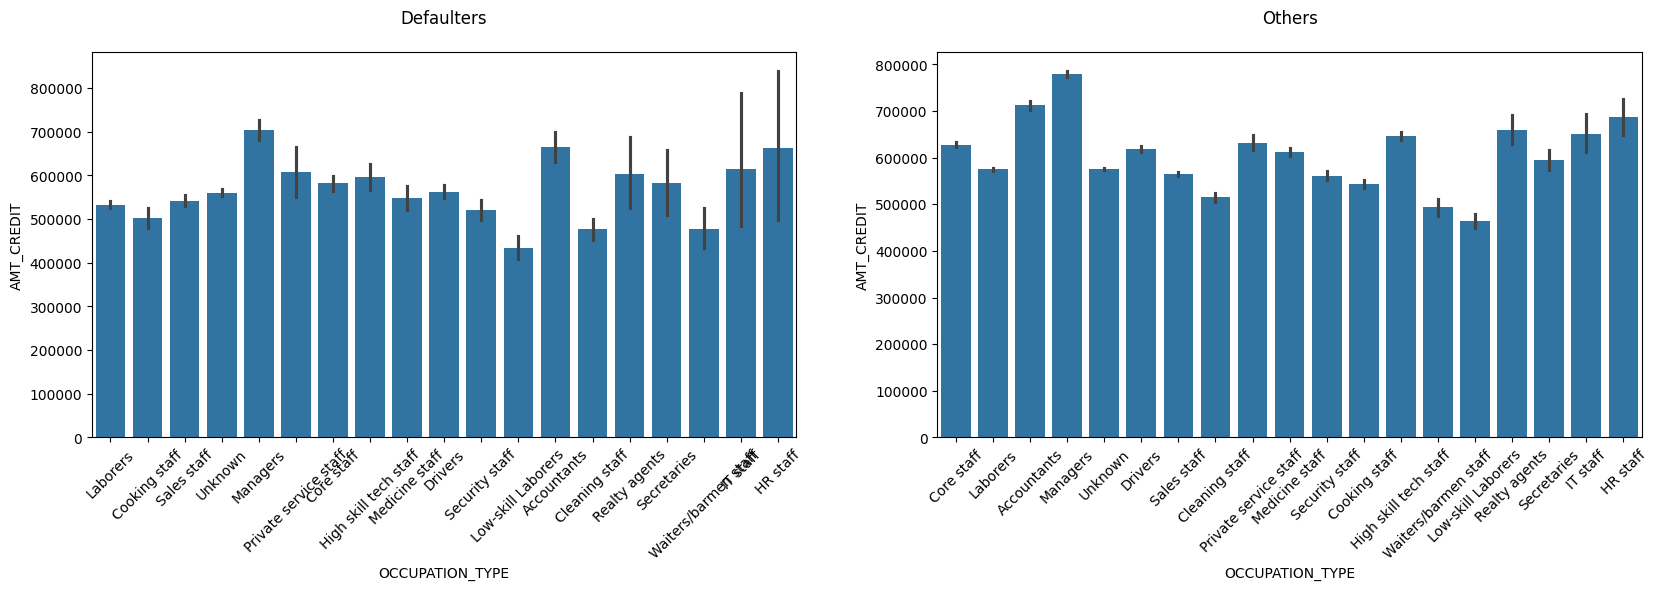

In [71]:
# OCCUPATION_TYPE - AMT_CREDIT
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulters\n')
sns.barplot(x="OCCUPATION_TYPE",y="AMT_CREDIT", data=defaults)
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Others\n')
sns.barplot(x="OCCUPATION_TYPE",y="AMT_CREDIT", data=others)
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation=45)
plt.show()

In [72]:
# Managers and Accountants have comparatively higher credit amount.
# Defaulters have high credit amount

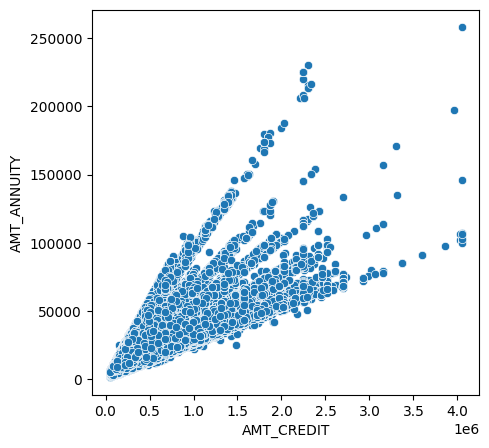

In [73]:
# AMT_CREDIT-AMT_ANNUITY
sns.scatterplot(x = "AMT_CREDIT", y = "AMT_ANNUITY", data = df1)
plt.show()

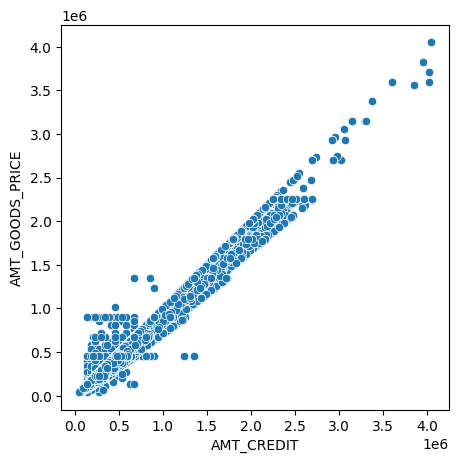

In [74]:
# # AMT_CREDIT-AMT_GOODS_PRICE
sns.scatterplot(x = "AMT_CREDIT", y = "AMT_GOODS_PRICE", data = df1)
plt.show()
# AMT_CREDIT-AMT_GOODS_PRICE

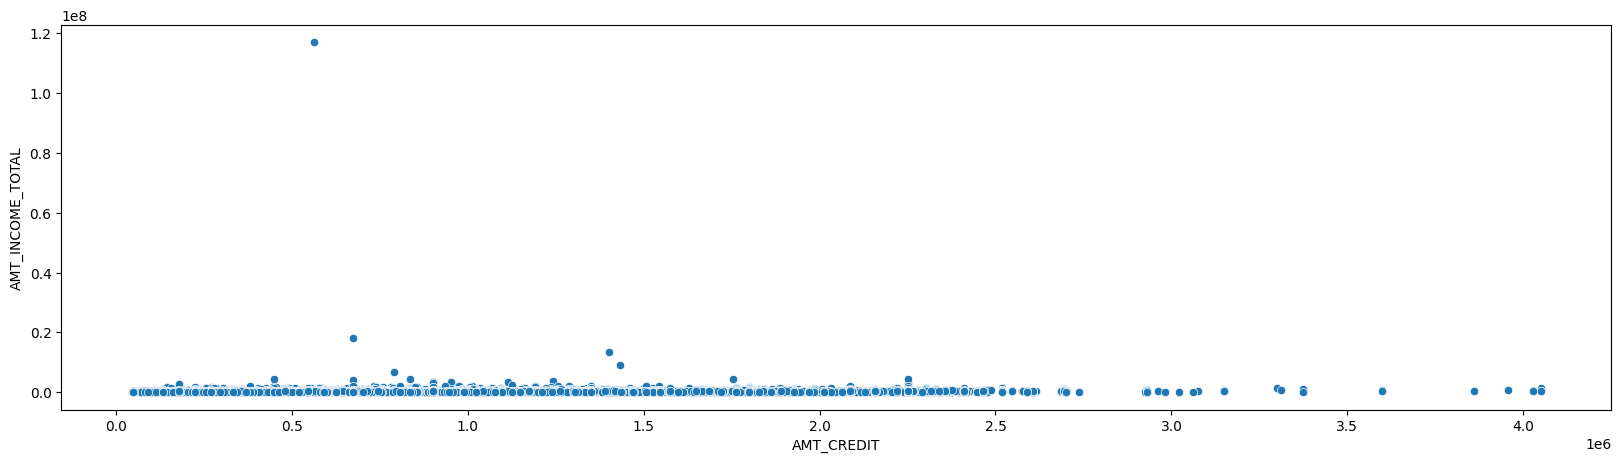

In [75]:
# # AMT_CREDIT-AMT_GOODS_PRICE
plt.figure(figsize=(20,5))
sns.scatterplot(x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL", data = df1)
plt.show()
# AMT_CREDIT and AMT_INCOME_TOTAL does not seem to be correlated.

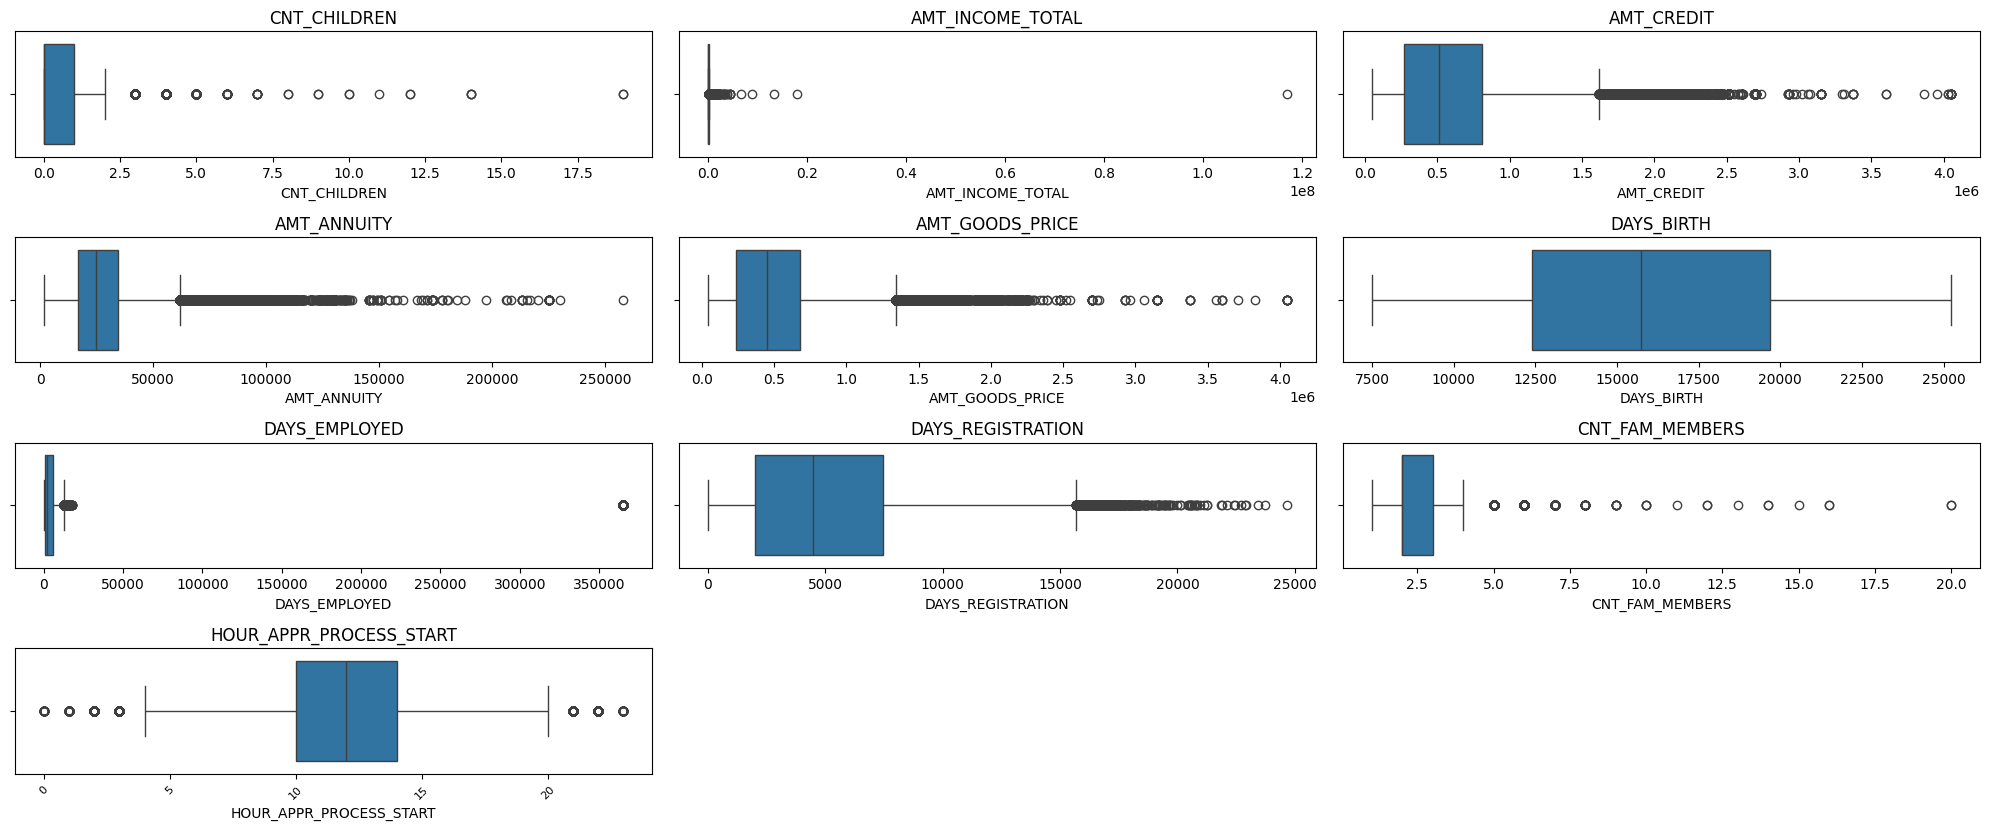

In [76]:
cols=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH',
      'DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START']
plt.figure(figsize=(20,10))
j = 1
for i in cols:
  plt.subplot(5, 3, j)
  sns.boxplot(x=df1.loc[:, i])
  plt.title(i)
  j += 1

plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# All numerical columns are having outliers which might need treatement

In [77]:
corr_df1 = defaults[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.038131     0.046421         0.037591   
AMT_CREDIT                0.038131    1.000000     0.752195         0.982783   
AMT_ANNUITY               0.046421    0.752195     1.000000         0.752295   
AMT_GOODS_PRICE           0.037591    0.982783     0.752295         1.000000   
DAYS_BIRTH               -0.003096    0.135316     0.014303         0.135738   
DAYS_EMPLOYED            -0.014977    0.001930    -0.081207         0.006648   
CNT_CHILDREN              0.004796   -0.001675     0.031257        -0.008111   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.003096      -0.014977      0.004796  
AMT_CREDIT          0.135316       0.001930     -0.001675  
AMT_ANNUITY         0.014303      -0.081207      0.031257  
AMT_GOODS_PRICE     0.135738       0.006648     -0.008111  
DAYS_BIRTH          1.000000       0.582185     -0.259109  
DAYS_EMPLOYED       0.582185       1.000000     -0.192864  
CNT_CHILDREN       -0.259109      -0.192864      1.000000

In [78]:
corr_df0 = others[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.342799     0.418948         0.349426   
AMT_CREDIT                0.342799    1.000000     0.771297         0.987022   
AMT_ANNUITY               0.418948    0.771297     1.000000         0.776421   
AMT_GOODS_PRICE           0.349426    0.987022     0.776421         1.000000   
DAYS_BIRTH               -0.062609    0.047378    -0.012260         0.044650   
DAYS_EMPLOYED            -0.140392   -0.070104    -0.104975        -0.068527   
CNT_CHILDREN              0.027397    0.003081     0.020909        -0.000559   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.062609      -0.140392      0.027397  
AMT_CREDIT          0.047378      -0.070104      0.003081  
AMT_ANNUITY        -0.012260      -0.104975      0.020909  
AMT_GOODS_PRICE     0.044650      -0.068527     -0.000559  
DAYS_BIRTH          1.000000       0.626114     -0.336966  
DAYS_EMPLOYED       0.626114       1.000000     -0.245174  
CNT_CHILDREN       -0.336966      -0.245174      1.000000

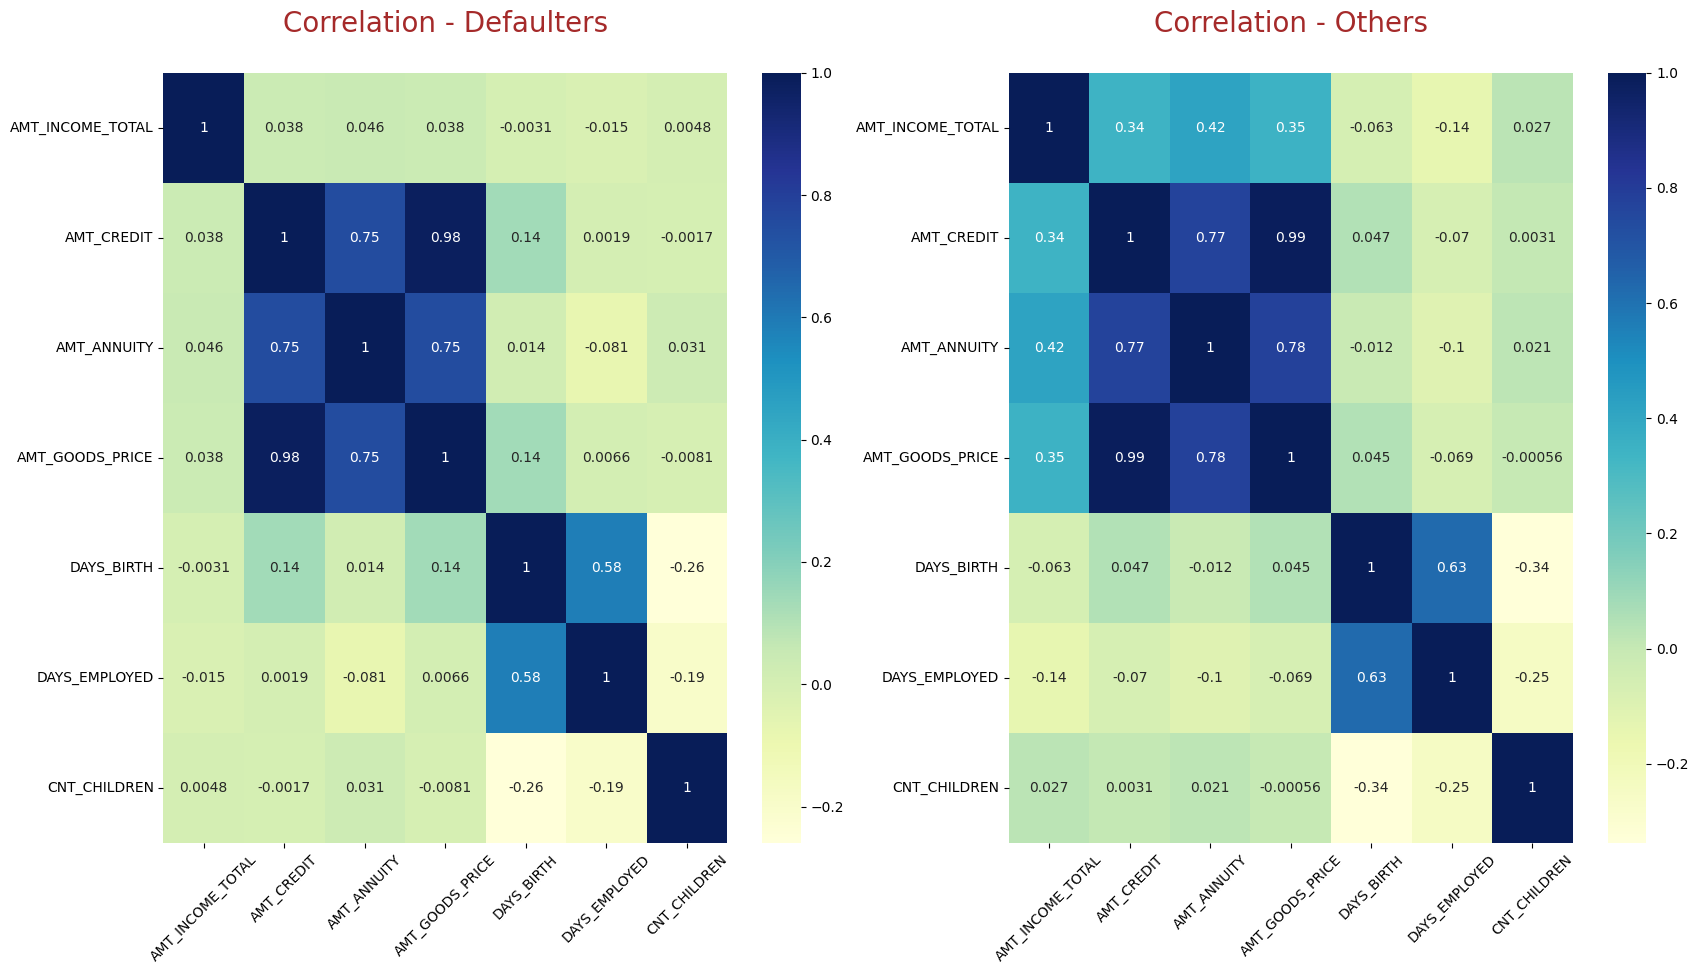

In [79]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.heatmap(corr_df1, cmap="YlGnBu", annot = True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.heatmap(corr_df0, cmap="YlGnBu", annot = True)
plt.title('Correlation - Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.show()

In [80]:
 # AMT_CREDIT is strongly correlated to AMT_ANNUITY and AMT_GOODS_PRICE in both cases

## Statistical test

In [81]:
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

In [82]:
df1['TARGET']=df1['TARGET'].astype('O')

In [83]:
df1.drop(columns=['TARGET','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']).select_dtypes(exclude=np.number).dtypes

NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
ORGANIZATION_TYPE               object
INCOME_GROUP                  category
dtype: object

In [84]:
for i in df1.select_dtypes(exclude=np.number):
    a=pd.crosstab(df1[i],df1["TARGET"])
    print(i,":",stats.chi2_contingency(a))
# Null Hypothesis (H₀): The variables are independent (no association between them).
# Alternative Hypothesis (H₁): The variables are not independent (there is an association between them).
# his is the p-value associated with the test. Since this p-value is extremely small (much smaller than a typical significance level like 0.05),
#you would reject the null hypothesis, indicating that the variables are not independent, meaning there is a significant association between them.

TARGET : Chi2ContingencyResult(statistic=307497.52517928014, pvalue=0.0, dof=1, expected_freq=array([[259865.09294302,  22820.90705698],
       [ 22820.90705698,   2004.09294302]]))
NAME_CONTRACT_TYPE : Chi2ContingencyResult(statistic=293.15054219964554, pvalue=1.0235150721172847e-65, dof=1, expected_freq=array([[255770.65910488,  22461.34089512],
       [ 26915.34089512,   2363.65910488]]))
CODE_GENDER : Chi2ContingencyResult(statistic=920.1038473528081, pvalue=4.183493188620687e-202, dof=1, expected_freq=array([[186108.28904332,  16343.71095668],
       [ 96577.71095668,   8481.28904332]]))
FLAG_OWN_CAR : Chi2ContingencyResult(statistic=146.65601825576024, pvalue=9.330994431109667e-34, dof=1, expected_freq=array([[186542.18504054,  16381.81495946],
       [ 96143.81495946,   8443.18504054]]))
FLAG_OWN_REALTY : Chi2ContingencyResult(statistic=11.57582729808418, pvalue=0.0006681470317545887, dof=1, expected_freq=array([[ 86594.42593598,   7604.57406402],
       [196091.57406402,  17220

In [85]:
from scipy.stats import shapiro
col=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
     "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","REGION_RATING_CLIENT",
     "REGION_RATING_CLIENT_W_CITY",	"HOUR_APPR_PROCESS_START",	"EXT_SOURCE_2",	"EXT_SOURCE_3",
     "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in col:
    g1=df1[df1["TARGET"]==1][i]
    g2=df1[df1["TARGET"]==0][i]
    print(i,stats.shapiro(g1),stats.shapiro(g2))

AMT_INCOME_TOTAL ShapiroResult(statistic=0.01677782971852504, pvalue=6.662375322133307e-142) ShapiroResult(statistic=0.6192600058599327, pvalue=2.347277203672878e-177)
AMT_CREDIT ShapiroResult(statistic=0.9049141805327058, pvalue=2.5634663814507962e-80) ShapiroResult(statistic=0.906051406373492, pvalue=6.906539376853772e-132)
AMT_ANNUITY ShapiroResult(statistic=0.950335616967387, pvalue=2.4323014446805237e-66) ShapiroResult(statistic=0.9103069513528247, pvalue=1.694215084066444e-130)
AMT_GOODS_PRICE ShapiroResult(statistic=0.8820380162995517, pvalue=2.931472402851972e-85) ShapiroResult(statistic=0.8903838302919731, pvalue=1.4503528520418792e-136)
REGION_POPULATION_RELATIVE ShapiroResult(statistic=0.8964173270912867, pvalue=2.916808606630239e-82) ShapiroResult(statistic=0.8760926768509598, pvalue=2.4311089073991435e-140)
DAYS_BIRTH ShapiroResult(statistic=0.962374384665713, pvalue=8.769366684236648e-61) ShapiroResult(statistic=0.970101969383913, pvalue=9.548528103092476e-100)
DAYS_EMPLO

In [86]:
# Given the p-value is extraordinarily small,
# you would reject the null hypothesis at any reasonable significance level (e.g., 0.05, 0.01).
# This means there is strong evidence that the two groups do not come from the same distribution, suggesting that there is a
# statistically significant difference between the two groups you compared.

In [87]:
from scipy.stats import mannwhitneyu
for i in df1[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","REGION_RATING_CLIENT",
     "REGION_RATING_CLIENT_W_CITY",	"HOUR_APPR_PROCESS_START",	"EXT_SOURCE_2",	"EXT_SOURCE_3", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_YEAR"]]:
    g1=df1[df1["TARGET"]==1][i]
    g2=df1[df1["TARGET"]==0][i]
    stat, p_value = mannwhitneyu(g1, g2)
    print(i,"stats:",stat,"p_value:",p_value)

AMT_CREDIT stats: 3378434520.0 p_value: 2.36018881652632e-22
AMT_ANNUITY stats: 3508297762.0 p_value: 0.9677479203683577
AMT_GOODS_PRICE stats: 3274917364.5 p_value: 2.821334043506046e-68
REGION_POPULATION_RELATIVE stats: 3281647585.5 p_value: 1.9999665809732712e-64
DAYS_BIRTH stats: 2926354691.5 p_value: 0.0
DAYS_EMPLOYED stats: 2866924137.5 p_value: 0.0
DAYS_REGISTRATION stats: 3210111966.0 p_value: 6.304065912692224e-110
DAYS_ID_PUBLISH stats: 3118165526.0 p_value: 1.3917745563748238e-186
REGION_RATING_CLIENT stats: 3846132118.5 p_value: 4.555791548665177e-234
REGION_RATING_CLIENT_W_CITY stats: 3853982907.5 p_value: 2.6798603110992284e-250
HOUR_APPR_PROCESS_START stats: 3339172571.5 p_value: 5.433090599121058e-37
EXT_SOURCE_2 stats: 2414683836.5 p_value: 0.0
EXT_SOURCE_3 stats: 2460886559.0 p_value: 0.0
OBS_30_CNT_SOCIAL_CIRCLE stats: 3575901262.0 p_value: 4.896756666134539e-08
DEF_30_CNT_SOCIAL_CIRCLE stats: 3641655396.5 p_value: 5.093631155153175e-72
OBS_60_CNT_SOCIAL_CIRCLE stats

In [88]:
# H₀: The two groups come from the same distribution (or have the same median).
# H₁: The two groups come from different distributions (or have different medians).
 #The p-value is extremely small (essentially 0 when considering typical significance levels, like 0.05).
#This means that the result is statistically significant, and you can reject the null hypothesis,
#which usually states that there is no difference between the two groups.

In [89]:
df_p = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/previous_application.csv')

In [90]:
df_p.shape

(1670214, 37)

In [91]:
df_p.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115834   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

In [92]:
df_null=(df_p.isnull().sum()/df_p.shape[0]*100).reset_index().sort_values(by=0,ascending=False)

In [93]:
df_null=df_null[df_null[0]>40].set_index("index")

In [94]:
df_null.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object', name='index')

In [95]:
col_with_40=['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING']
for i in col_with_40:
  df_p.drop(columns=i,inplace=True)

In [96]:
df_p.shape

(1670214, 26)

In [97]:
df_p.isnull().sum()/df_p.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
dtype: float64

In [98]:
df_p.select_dtypes(np.number).skew()

# all are skewed we can impute null values with medin

SK_ID_PREV                  -0.000573
SK_ID_CURR                  -0.003303
AMT_ANNUITY                  2.692572
AMT_APPLICATION              3.391442
AMT_CREDIT                   3.245815
AMT_GOODS_PRICE              3.073690
HOUR_APPR_PROCESS_START     -0.025629
NFLAG_LAST_APPL_IN_DAY     -16.735924
DAYS_DECISION               -1.053080
SELLERPLACE_AREA           529.620279
CNT_PAYMENT                  1.531403
dtype: float64

In [99]:
df_p.select_dtypes(exclude=np.number).describe()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
count           1670214             1670214        1670214           1670214   
unique                4                  28              5                 3   
top            Repeater                 XNA            POS               XNA   
freq            1231261              950809         691011           1063666   

                   CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
count                   1670214              1670214          1670214   
unique                        8                   11                5   
top     Credit and cash offices                  XNA              XNA   
freq                     719968               855720           517215   

       PRODUCT_COMBINATION  
count              1669868  
unique                  17  
top                   Cash  
freq                285990

In [100]:
df_p.select_dtypes(exclude=np.number).isnull().sum()

NAME_CONTRACT_TYPE               0
WEEKDAY_APPR_PROCESS_START       0
FLAG_LAST_APPL_PER_CONTRACT      0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [101]:
df_p["PRODUCT_COMBINATION"]=df_p["PRODUCT_COMBINATION"].fillna(df_p["PRODUCT_COMBINATION"].mode()[0])

In [102]:
for i in df_p.select_dtypes(np.number):
  df_p[i]=df_p[i].fillna(df_p[i].median())

In [103]:
df_p.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [104]:
df_p.select_dtypes(np.number).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

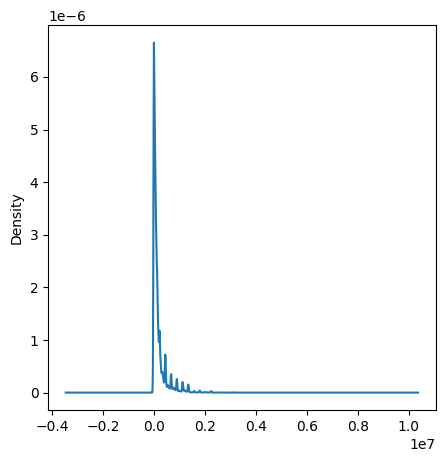

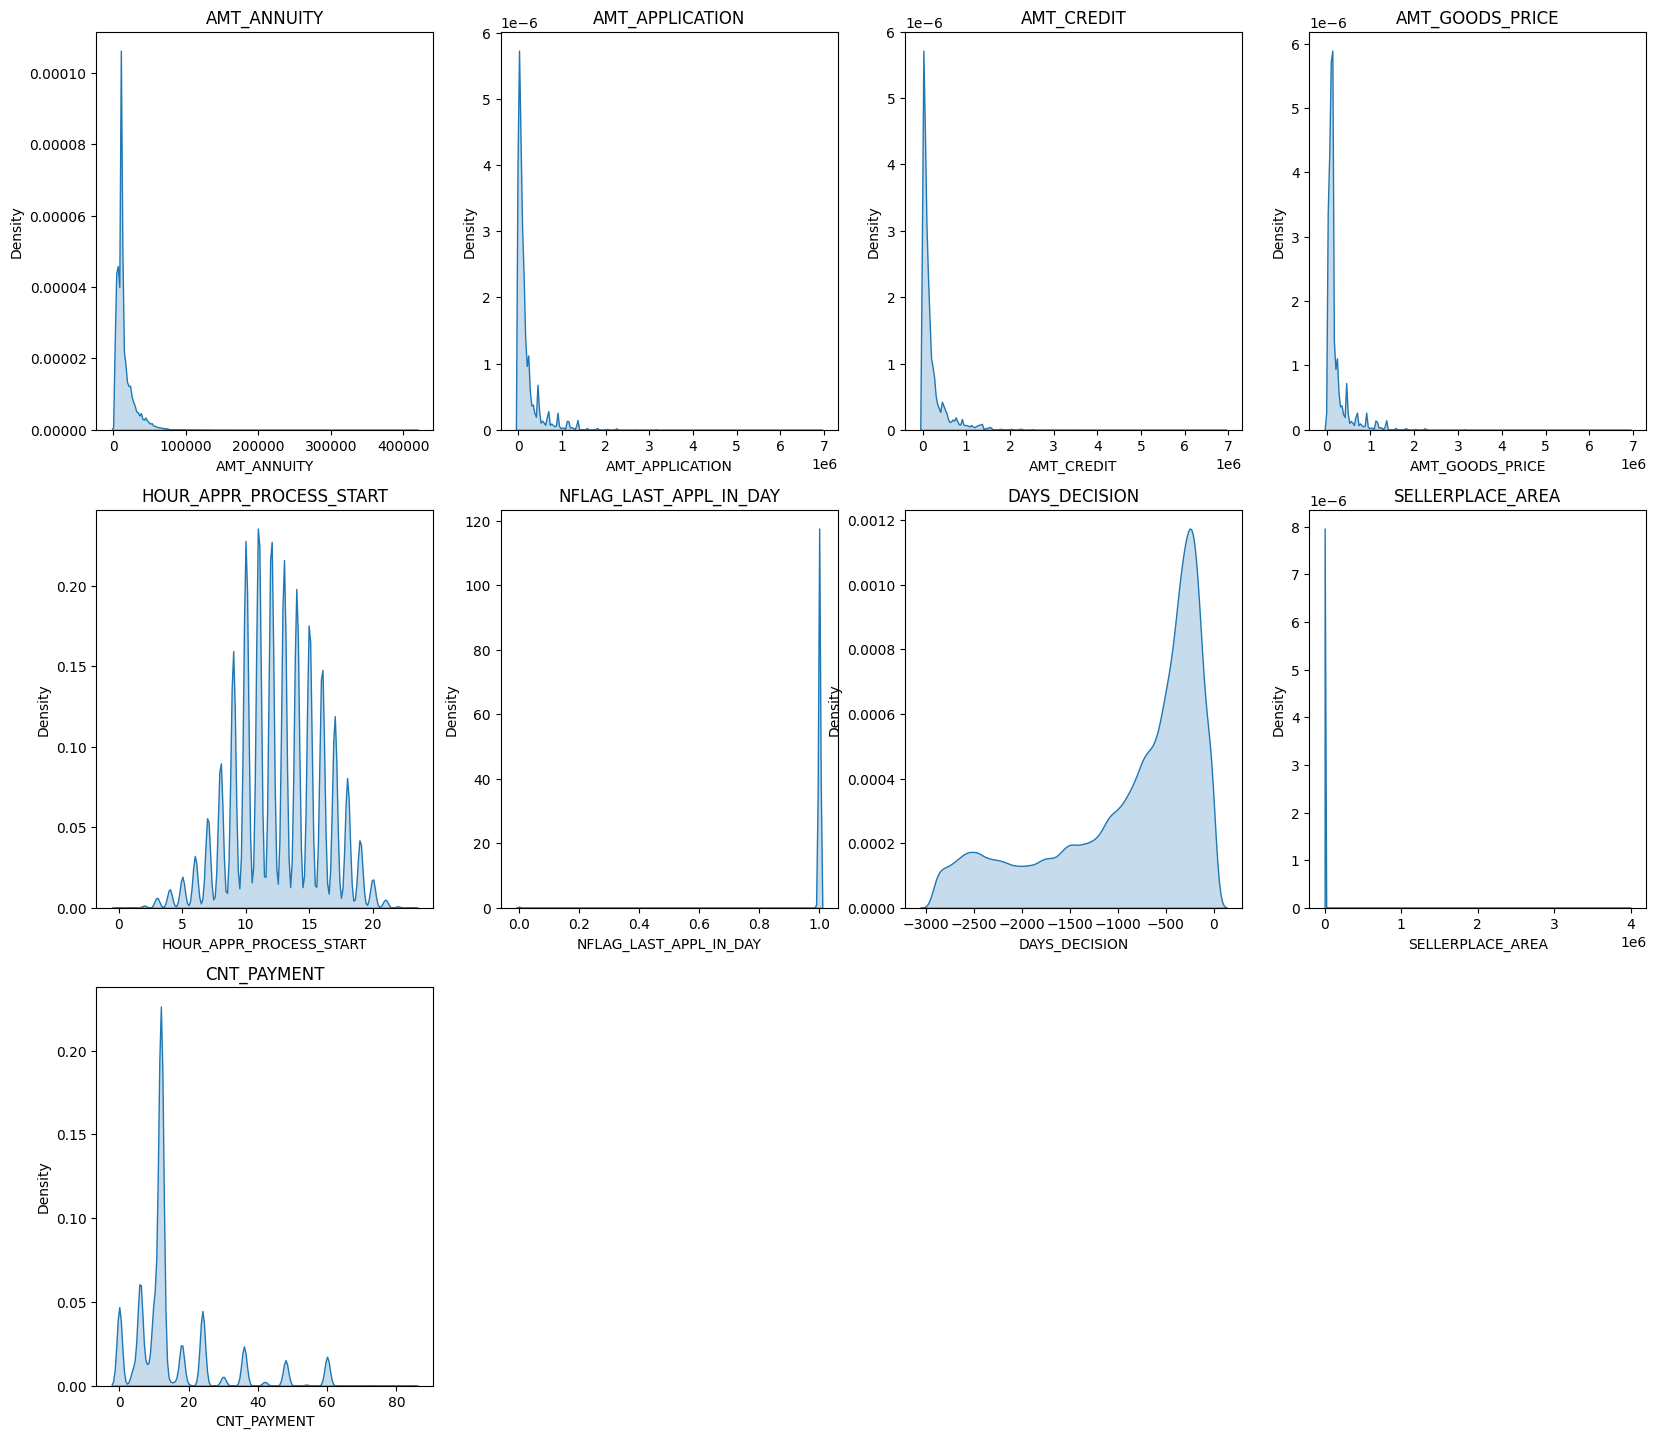

In [105]:
df_p['AMT_APPLICATION'].plot(kind='kde')

cols=df_p.select_dtypes(np.number).drop(columns=["SK_ID_PREV","SK_ID_CURR"]).columns

plt.figure(figsize =[20,30])
j=1
for i in cols:
    plt.subplot(5,4,j)
    sns.kdeplot(df_p[i],fill =True)
    plt.title(i)
    j+=1

In [106]:
pd.set_option('display.max_columns',None)


df_p.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [107]:
df_p.select_dtypes(exclude=np.number).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

<Axes: xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

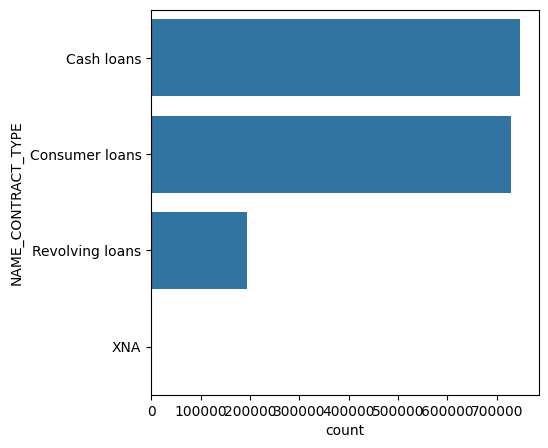

In [ ]:
sns.countplot(df_p['NAME_CONTRACT_TYPE'],order=df_p['NAME_CONTRACT_TYPE'].value_counts().index)

<Axes: xlabel='count', ylabel='WEEKDAY_APPR_PROCESS_START'>

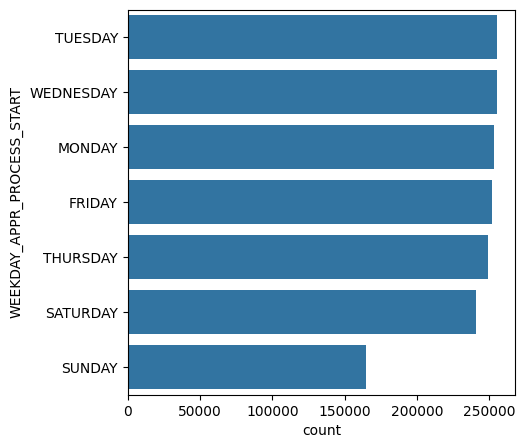

In [ ]:
sns.countplot(df_p['WEEKDAY_APPR_PROCESS_START'],order=df_p['WEEKDAY_APPR_PROCESS_START'].value_counts().index)

<Axes: xlabel='count', ylabel='FLAG_LAST_APPL_PER_CONTRACT'>

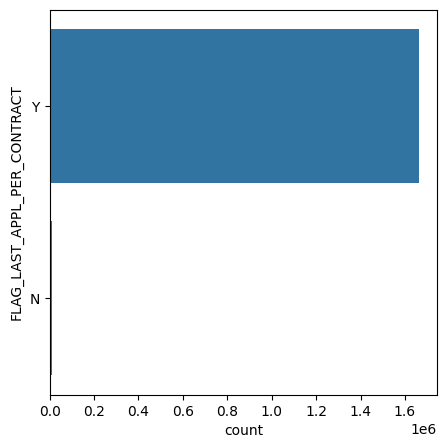

In [ ]:
sns.countplot(df_p['FLAG_LAST_APPL_PER_CONTRACT'],order=df_p['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

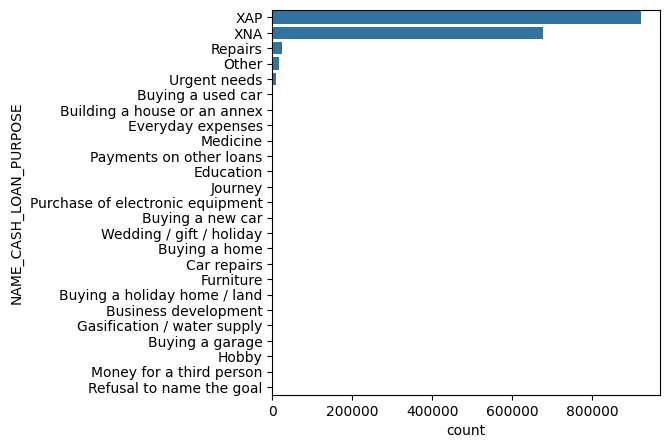

In [ ]:
sns.countplot(df_p['NAME_CASH_LOAN_PURPOSE'],order=df_p['NAME_CASH_LOAN_PURPOSE'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_CONTRACT_STATUS'>

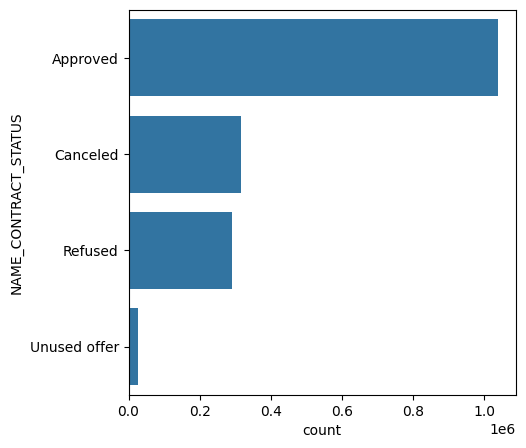

In [ ]:
sns.countplot(df_p['NAME_CONTRACT_STATUS'],order=df_p['NAME_CONTRACT_STATUS'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_PAYMENT_TYPE'>

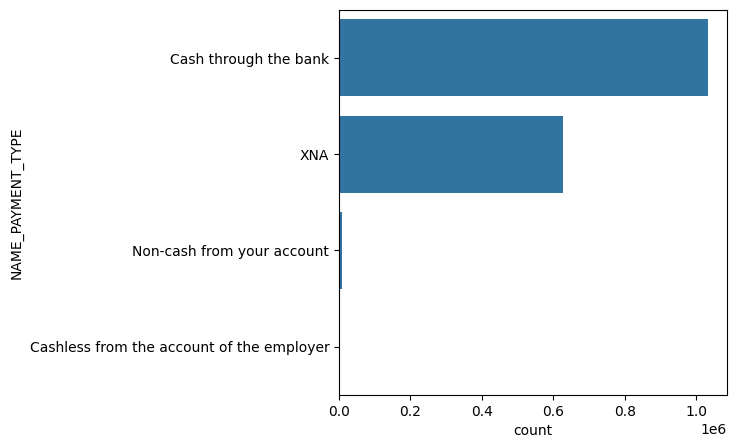

In [ ]:
sns.countplot(df_p['NAME_PAYMENT_TYPE'],order=df_p['NAME_PAYMENT_TYPE'].value_counts().index)

<Axes: xlabel='count', ylabel='CODE_REJECT_REASON'>

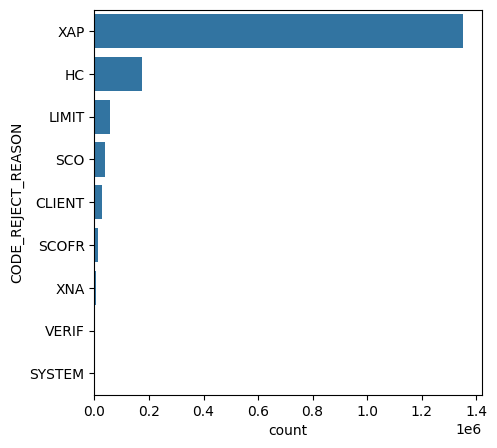

In [ ]:
sns.countplot(df_p['CODE_REJECT_REASON'],order=df_p['CODE_REJECT_REASON'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_CLIENT_TYPE'>

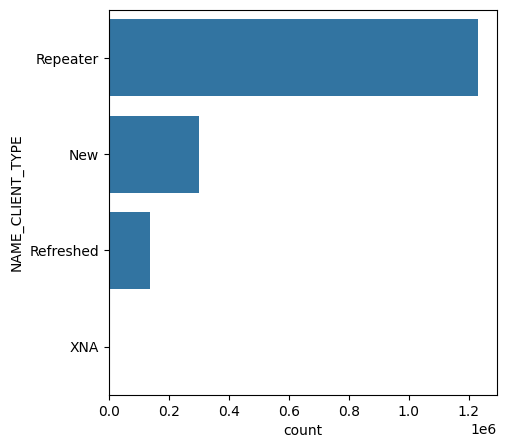

In [ ]:
sns.countplot(df_p['NAME_CLIENT_TYPE'],order=df_p['NAME_CLIENT_TYPE'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_GOODS_CATEGORY'>

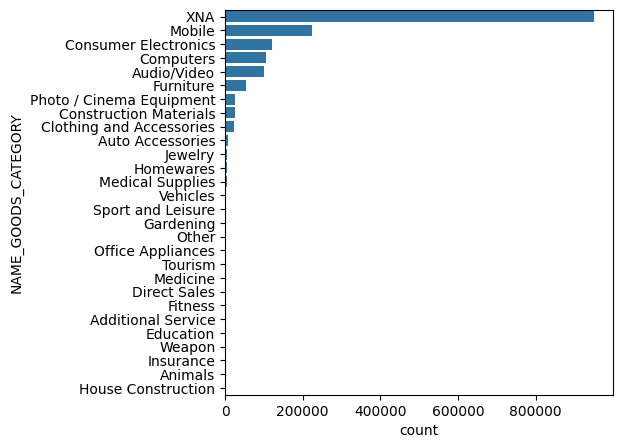

In [ ]:
sns.countplot(df_p['NAME_GOODS_CATEGORY'],order=df_p['NAME_GOODS_CATEGORY'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_PORTFOLIO'>

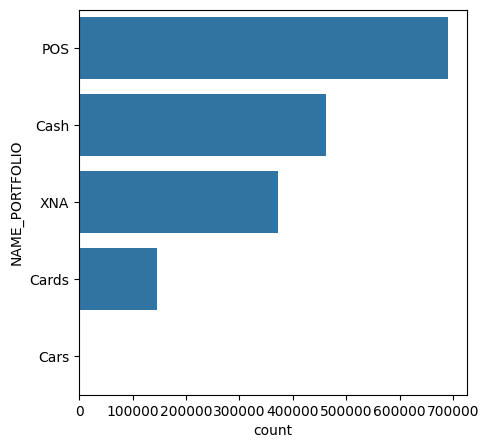

In [ ]:
sns.countplot(df_p['NAME_PORTFOLIO'],order=df_p['NAME_PORTFOLIO'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_PRODUCT_TYPE'>

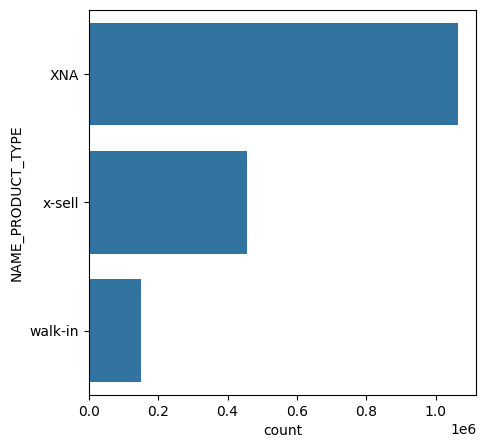

In [ ]:
sns.countplot(df_p['NAME_PRODUCT_TYPE'],order=df_p['NAME_PRODUCT_TYPE'].value_counts().index)

<Axes: xlabel='count', ylabel='CHANNEL_TYPE'>

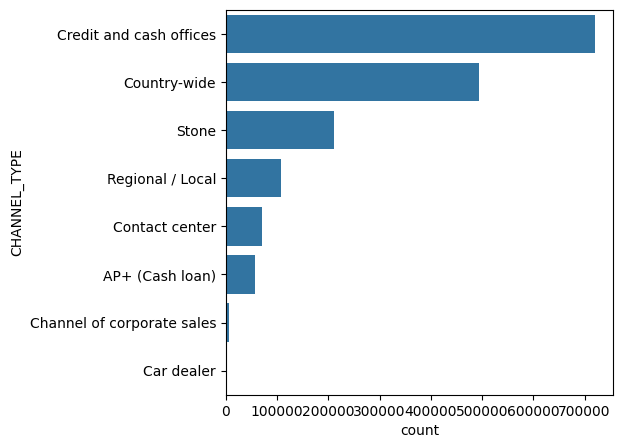

In [ ]:
sns.countplot(df_p['CHANNEL_TYPE'],order=df_p['CHANNEL_TYPE'].value_counts().index)

<Axes: xlabel='count', ylabel='NAME_SELLER_INDUSTRY'>

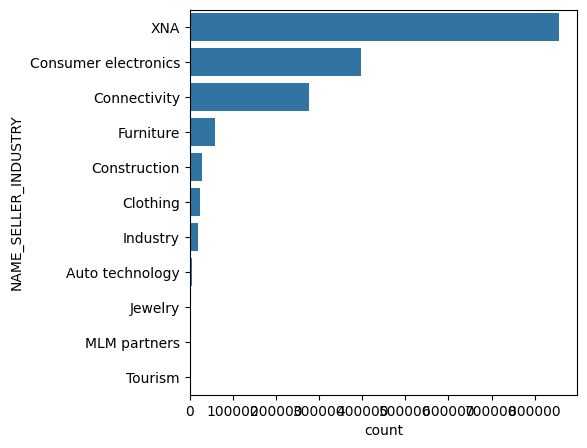

In [ ]:
sns.countplot(df_p['NAME_SELLER_INDUSTRY'],order=df_p['NAME_SELLER_INDUSTRY'].value_counts().index)

<Axes: xlabel='count', ylabel='PRODUCT_COMBINATION'>

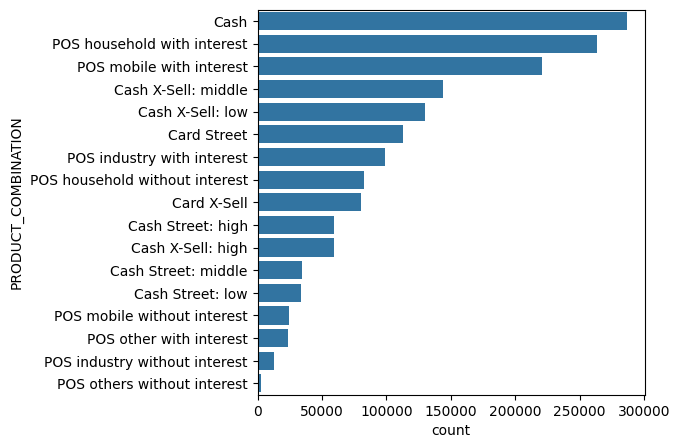

In [ ]:
sns.countplot(df_p['PRODUCT_COMBINATION'],order=df_p['PRODUCT_COMBINATION'].value_counts().index)

In [ ]:
df_p['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

XAP (1353093): This could refer to a rejection related to an application processing error, such as missing or incorrect information in the application.

HC (175231): This might indicate a health-related issue, potentially involving compliance with health regulations or requirements.

LIMIT (55680): This likely pertains to exceeding a predefined limit, such as financial thresholds or operational limits set by a regulatory body.

SCO (37467): This could refer to a score-related issue, possibly indicating that a score (like a credit score) fell below acceptable levels.

CLIENT (26436): This may relate to client-specific issues, such as account status or client eligibility.

SCOFR (12811): This could refer to a specific scoring framework or criteria that was not met.

XNA (5244): This might indicate a rejection due to an unknown or unspecified reason, often used when other codes do not apply.

VERIF (3535): This likely refers to verification issues, such as problems confirming identity or credentials.

cols=df_p.select_dtypes(np.number).drop(columns=["SK_ID_PREV","SK_ID_CURR"]).columns
plt.figure(figsize=(20,10))
j = 1
for i in cols:
  plt.subplot(5, 3, j)
  sns.boxplot(x=df_p.loc[:, i])
  plt.title(i)
  j += 1

plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

## POS CASH BALANCE EDA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/POS_CASH_balance.csv")
df.head()


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
df.shape

(10001358, 8)

In [ ]:
df.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
df.isnull().sum()*100/df.shape[0]

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [ ]:
df.select_dtypes(include=np.number).describe().round()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  10001358.0  10001358.0      10001358.0       9975287.0   
mean    1903217.0    278404.0           -35.0            17.0   
std      535847.0    102764.0            26.0            12.0   
min     1000001.0    100001.0           -96.0             1.0   
25%     1434405.0    189550.0           -54.0            10.0   
50%     1896565.0    278654.0           -28.0            12.0   
75%     2368963.0    367429.0           -13.0            24.0   
max     2843499.0    456255.0            -1.0            92.0   

       CNT_INSTALMENT_FUTURE      SK_DPD  SK_DPD_DEF  
count              9975271.0  10001358.0  10001358.0  
mean                    10.0        12.0         1.0  
std                     11.0       133.0        33.0  
min                      0.0         0.0         0.0  
25%                      3.0         0.0         0.0  
50%                      7.0         0.0         0.0  
75%                     14.0         0.0         0.0  
max                     85.0      4231.0      3595.0

In [ ]:
df.select_dtypes(exclude=np.number).describe()


NAME_CONTRACT_STATUS
count              10001358
unique                    9
top                  Active
freq                9151119


* SK_ID_PREV :ID of previous credit in Home Credit related to loan in our sample.
            (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

* SK_ID_CURR : ID of loan in our sample

* MONTHS_BALANCE : Month of balance relative to application date (-1 means the information to the freshest monthly snapshot,
                 0 means the information at application - often it will be the same as -1
                 as many banks are not updating the information to Credit Bureau regularly )

* CNT_INSTALMENT : Term of previous credit (can change over time)

* CNT_INSTALMENT_FUTURE : Installments left to pay on the previous credit

* NAME_CONTRACT_STATUS : Contract status during the month

* SK_DPD : DPD (days past due) during the month of previous credit

* SK_DPD_DEF : DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


In [ ]:
df.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

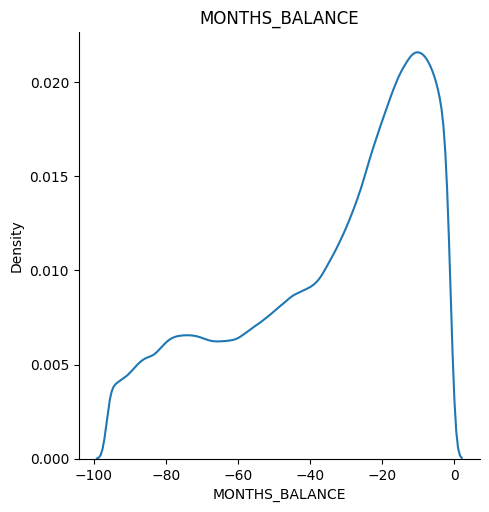

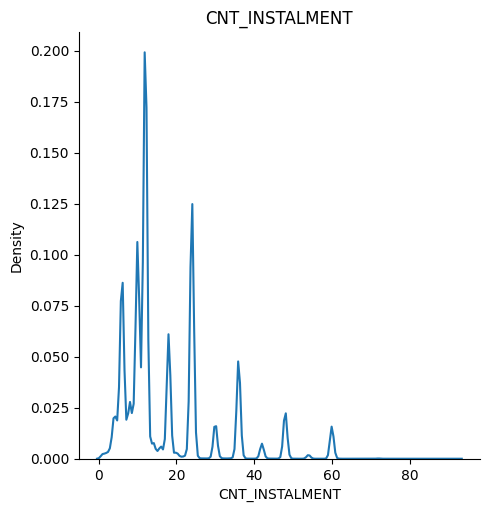

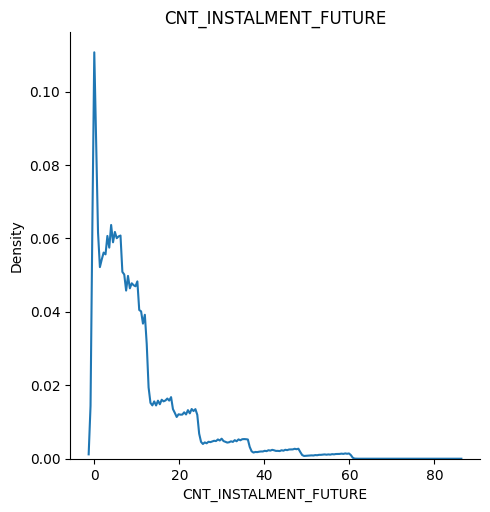

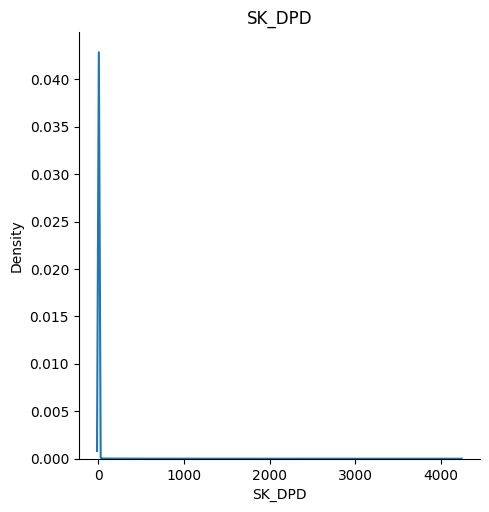

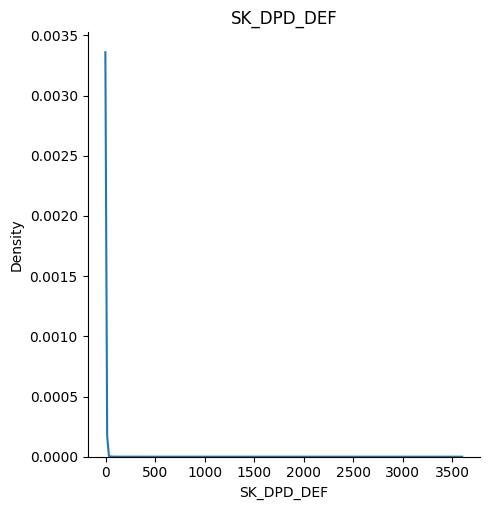

In [ ]:

cols=['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF']

for i in cols:
    sns.displot(df[i],kind='kde')
    plt.title(i)
    plt.show()


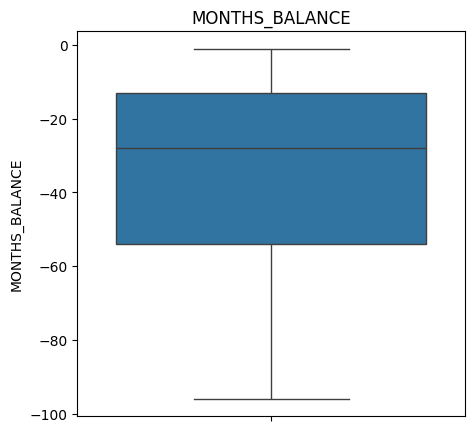

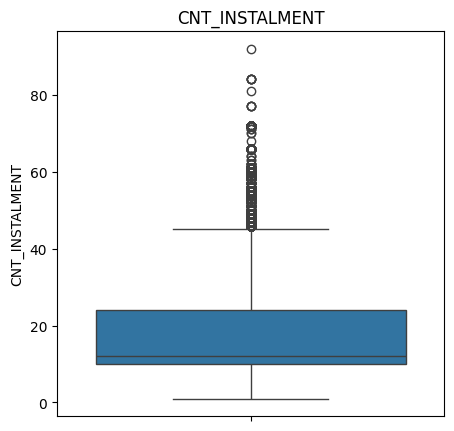

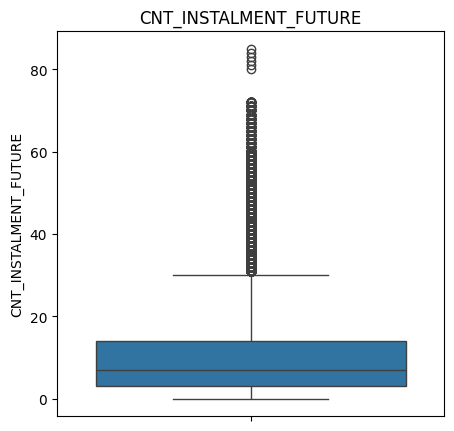

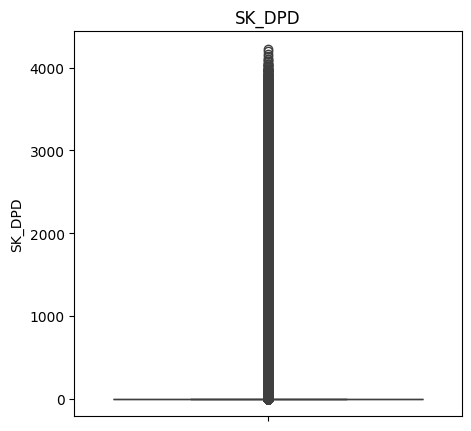

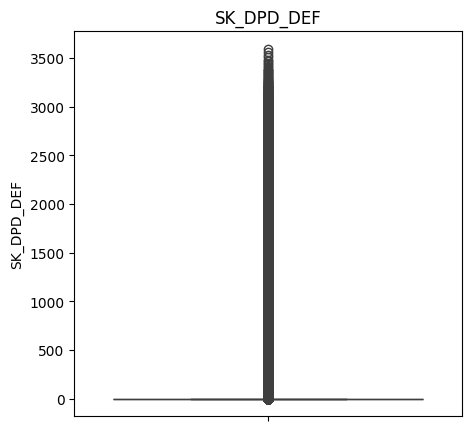

In [ ]:

cols=['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF']

for i in cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()




In [ ]:
df['NAME_CONTRACT_STATUS'].unique()


array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [ ]:

df['NAME_CONTRACT_STATUS'].value_counts()


NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

In [ ]:

df['SK_DPD'].value_counts()


SK_DPD
0       9706131
1         21872
2         17358
3         14403
4         12350
5         11046
6          9615
7          8332
8          7360
9          6668
10         6049
11         5392
12         4907
13         4468
14         3944
15         3438
16         3169
17         2980
18         2759
19         2532
20         2322
21         1996
22         1820
23         1586
24         1386
25         1258
26         1101
27          923
28          864
29          700
30          571
31          518
32          512
33          439
35          428
34          401
36          338
37          321
39          289
38          288
40          284
41          274
43          267
44          250
42          237
49          237
45          226
50          225
48          225
47          217
46          216
53          210
51          210
59          201
69          196
74          194
67          194
54          194
63          192
78          188
73          187
68          183
52          180
80          179
65          178
66          178
77          175
98          175
109         172
61          172
128         172
97          172
71          172
99          172
79          171
94          171
64          170
111         170
104         170
70          169
125         167
81          167
158         166
100         165
93          164
84          163
62          162
120         161
186         161
130         161
135         161
72          160
141         160
89          159
56          159
60          157
82          156
90          156
85          156
105         156
92          155
139         155
110         155
155         154
126         153
76          153
124         153
133         153
189         152
151         152
96          151
159         151
112         151
102         150
108         150
172         150
57          148
91          147
140         147
58          147
83          146
103         146
115         146
55          146
166         143
161         143
212         143
95          142
134         142
114         142
75          141
127         141
194         141
106         141
229         140
129         139
170         139
165         138
191         137
203         137
217         137
107         136
146         136
201         136
119         135
131         134
204         134
87          133
171         133
163         133
188         133
154         133
142         133
143         133
192         133
156         133
164         132
220         132
168         132
150         131
137         131
101         131
121         131
222         131
123         130
169         129
181         128
216         128
157         128
160         127
231         127
202         127
196         127
145         127
187         126
179         125
132         125
247         125
262         125
173         125
198         125
136         124
86          124
113         124
152         123
246         123
176         123
162         123
118         123
253         123
232         123
233         122
182         122
138         122
372         122
321         122
88          122
219         121
395         120
190         120
200         120
261         119
185         119
284         119
225         119
144         119
292         119
167         119
148         119
197         118
250         118
116         118
207         118
199         117
224         117
245         117
215         116
260         116
290         116
117         115
183         115
249         115
184         114
122         114
264         114
314         114
153         114
353         114
210         113
195         113
277         113
175         113
180         112
227         112
193         112
223         112
218         112
414         112
276         111
257         111
255         111
177         111
323         110
453         110
273         110
352         110
248         110
259         110
230         109
214      

### Distribution of Contract Status

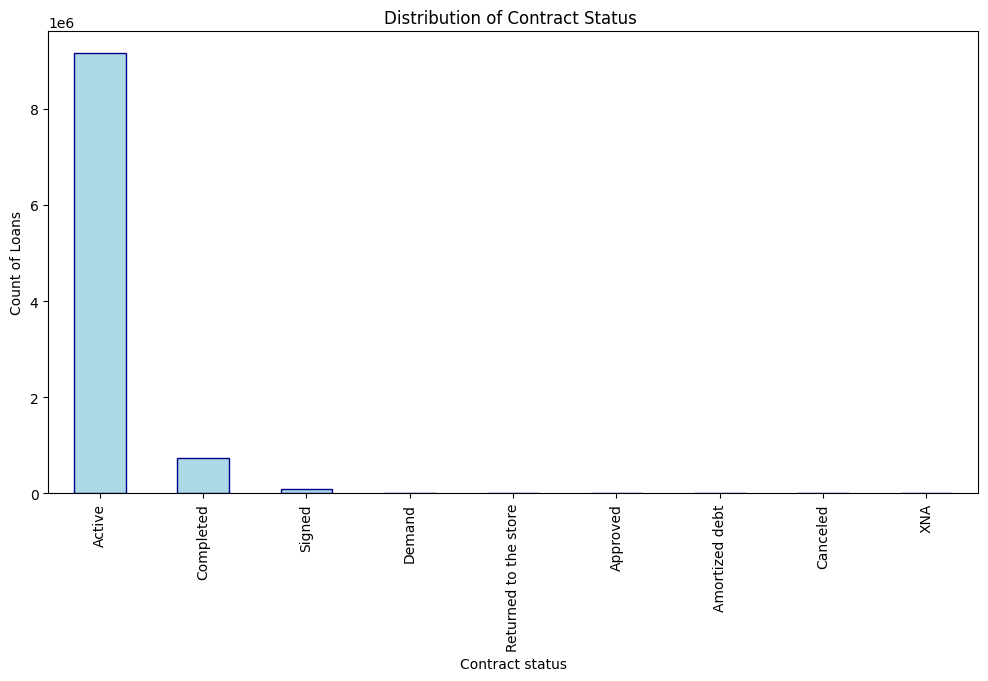

In [ ]:

df["NAME_CONTRACT_STATUS"].unique()

plt.figure(figsize=(12,6))
df['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar',color='lightblue',edgecolor='darkblue')
plt.title('Distribution of Contract Status ')
plt.xlabel('Contract status')
plt.ylabel('Count of Loans')
plt.show()



* Majority of the clients have "Active" status in NAME_CONTRACT_STATUS.


In [ ]:

a=df.select_dtypes(include=np.number).corr()
a

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
SK_ID_PREV               1.000000   -0.000336        0.001835        0.003820   
SK_ID_CURR              -0.000336    1.000000        0.000404        0.000144   
MONTHS_BALANCE           0.001835    0.000404        1.000000        0.336163   
CNT_INSTALMENT           0.003820    0.000144        0.336163        1.000000   
CNT_INSTALMENT_FUTURE    0.003679   -0.000559        0.271595        0.871276   
SK_DPD                  -0.000487    0.003118       -0.018939       -0.060803   
SK_DPD_DEF               0.004848    0.001948       -0.000381       -0.014154   

                       CNT_INSTALMENT_FUTURE    SK_DPD  SK_DPD_DEF  
SK_ID_PREV                          0.003679 -0.000487    0.004848  
SK_ID_CURR                         -0.000559  0.003118    0.001948  
MONTHS_BALANCE                      0.271595 -0.018939   -0.000381  
CNT_INSTALMENT                      0.871276 -0.060803   -0.014154  
CNT_INSTALMENT_FUTURE               1.000000 -0.082004   -0.017436  
SK_DPD                             -0.082004  1.000000    0.245782  
SK_DPD_DEF                         -0.017436  0.245782    1.000000

<Axes: >

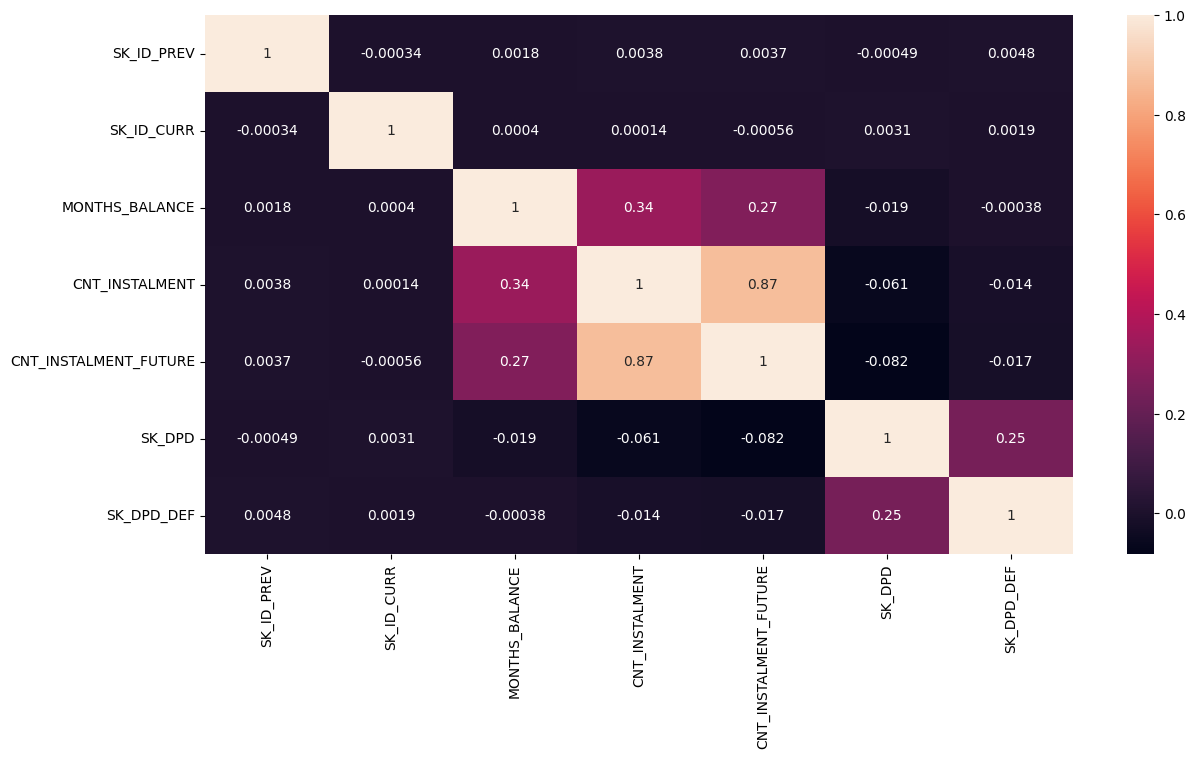

In [ ]:

plt.figure(figsize=(14,7))
sns.heatmap(a,annot=True)

In [ ]:
df.drop(columns=['SK_ID_PREV', 'SK_ID_CURR'], inplace=True)

In [ ]:
b = df.select_dtypes(include=np.number).corr()

b

MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
MONTHS_BALANCE               1.000000        0.336163               0.271595   
CNT_INSTALMENT               0.336163        1.000000               0.871276   
CNT_INSTALMENT_FUTURE        0.271595        0.871276               1.000000   
SK_DPD                      -0.018939       -0.060803              -0.082004   
SK_DPD_DEF                  -0.000381       -0.014154              -0.017436   

                         SK_DPD  SK_DPD_DEF  
MONTHS_BALANCE        -0.018939   -0.000381  
CNT_INSTALMENT        -0.060803   -0.014154  
CNT_INSTALMENT_FUTURE -0.082004   -0.017436  
SK_DPD                 1.000000    0.245782  
SK_DPD_DEF             0.245782    1.000000

<Axes: >

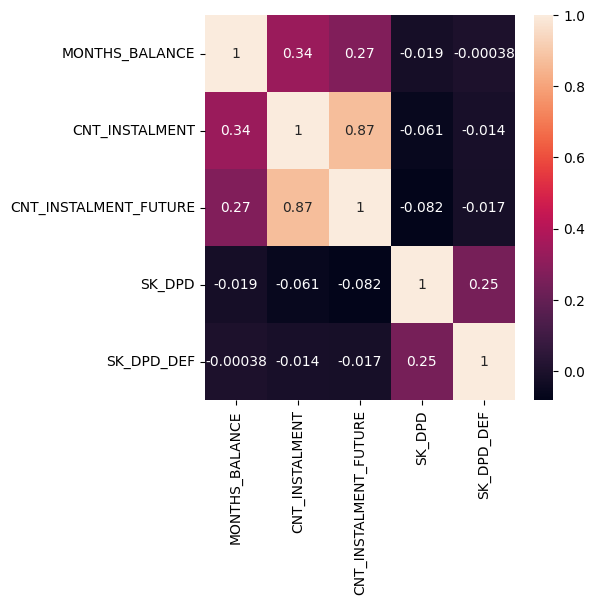

In [ ]:
sns.heatmap(b,annot=True)

In [ ]:
df.isnull().sum()

MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:

df["CNT_INSTALMENT"]=df["CNT_INSTALMENT"].fillna(df["CNT_INSTALMENT"].median())

df["CNT_INSTALMENT_FUTURE"]=df["CNT_INSTALMENT_FUTURE"].fillna(df["CNT_INSTALMENT_FUTURE"].median())


In [ ]:
df.columns

Index(['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

(array([270.,   2.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([1.000000e+00, 2.357040e+05, 4.714070e+05, 7.071100e+05,
        9.428130e+05, 1.178516e+06, 1.414219e+06, 1.649922e+06,
        1.885625e+06, 2.121328e+06, 2.357031e+06]),
 <BarContainer object of 10 artists>)

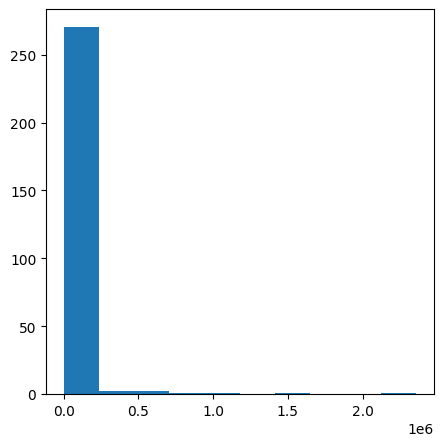

In [ ]:
plt.hist(df.groupby('NAME_CONTRACT_STATUS')["CNT_INSTALMENT"].value_counts())


### MONTHS_BALANCE

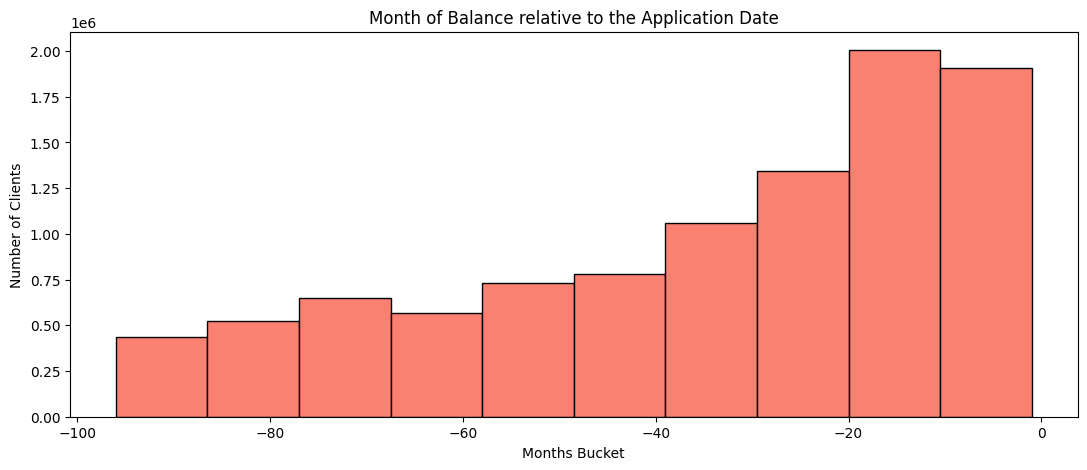

In [ ]:

plt.figure(figsize=(13,5))
plt.hist((df['MONTHS_BALANCE']).values,edgecolor='black',color='salmon')
plt.title('Month of Balance relative to the Application Date')
plt.xlabel('Months Bucket')
plt.ylabel('Number of Clients')
plt.show()



* MONTHS_BALANCE for majority of the clients is between 10 and 20 months before the date of application.


In [ ]:

df.columns


Index(['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### Number of installments already paid.


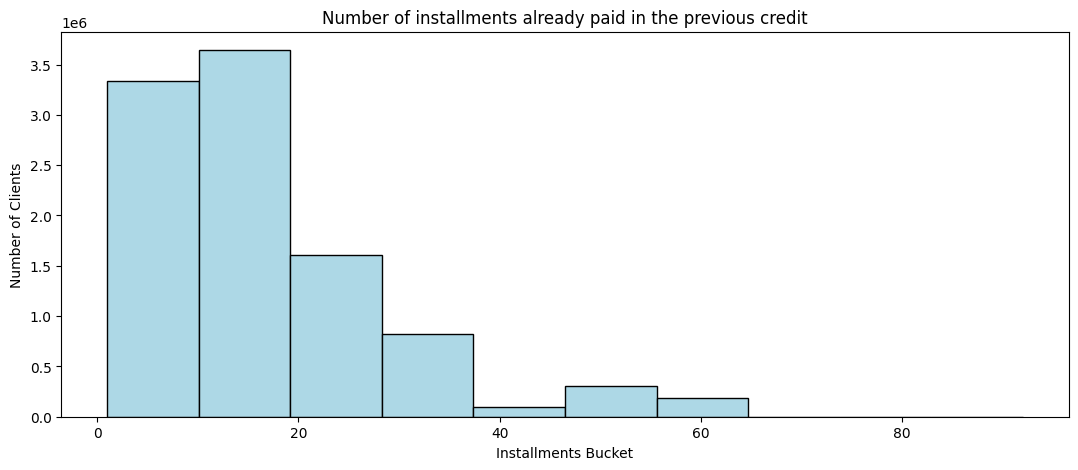

In [ ]:

plt.figure(figsize=(13,5))
plt.hist((df['CNT_INSTALMENT']).values,edgecolor='black',color='lightblue')
plt.title('Number of installments already paid in the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of Clients')
plt.show()



* Majority of the clients have number of installments less than equal 20



### Number of installments left to pay


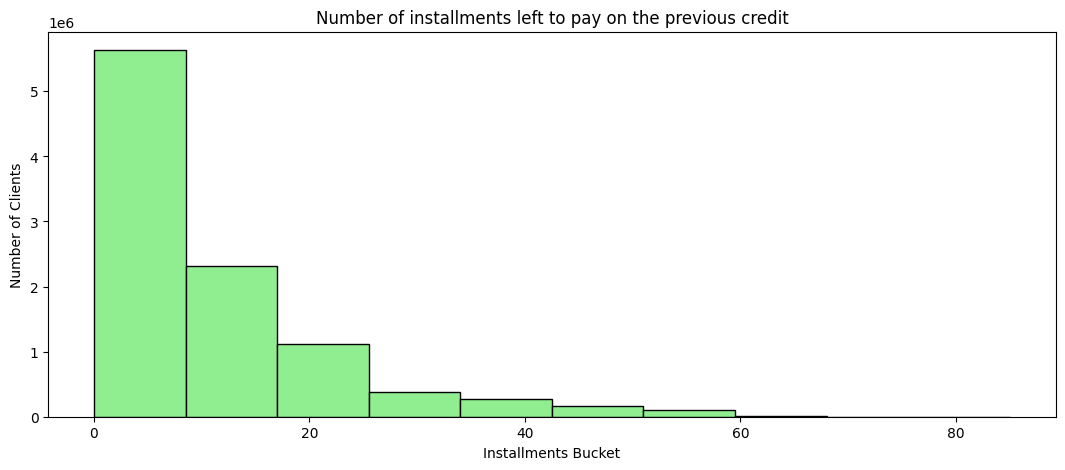

In [ ]:

plt.figure(figsize=(13,5))
plt.hist((df['CNT_INSTALMENT_FUTURE']).values,edgecolor='black',color='lightgreen')
plt.title('Number of installments left to pay on the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of Clients')
plt.show()



* Majority of the the clients have less than 10 installments left to pay off.

## Installments Balance

In [ ]:
df_inst=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/installments_payments.csv")
df_inst.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [ ]:
df_inst.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:
df_inst.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [ ]:
df_inst.isnull().sum()/df_inst.shape[0]*100

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.021352
dtype: float64

In [ ]:
df_inst.shape

(13605401, 8)

In [ ]:
df_inst.dropna(inplace=True)
df_inst.shape

(13602496, 8)

<Axes: ylabel='Density'>

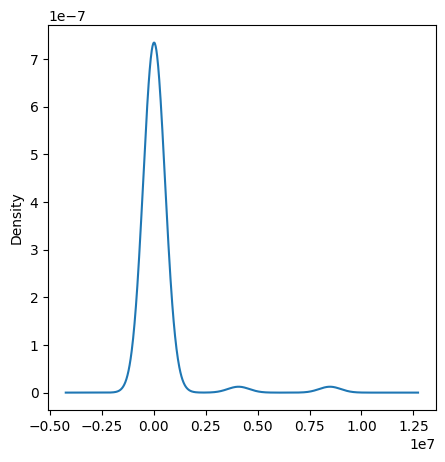

In [ ]:
df_inst['NUM_INSTALMENT_VERSION'].value_counts().plot(kind='kde')

<Axes: ylabel='Density'>

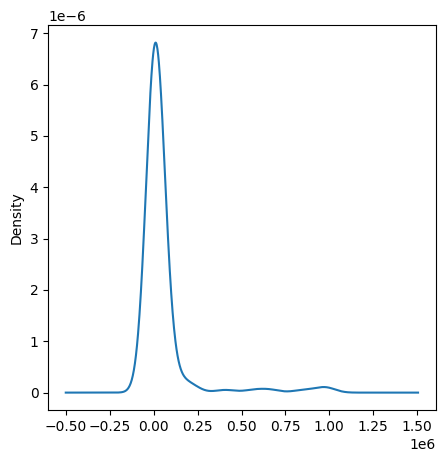

In [ ]:
df_inst['NUM_INSTALMENT_NUMBER'].value_counts().plot(kind='kde')

<Axes: ylabel='Density'>

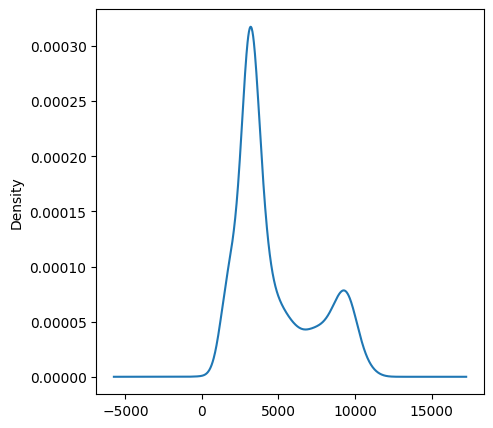

In [ ]:
df_inst['DAYS_INSTALMENT'].value_counts().plot(kind='kde')

<Axes: ylabel='Density'>

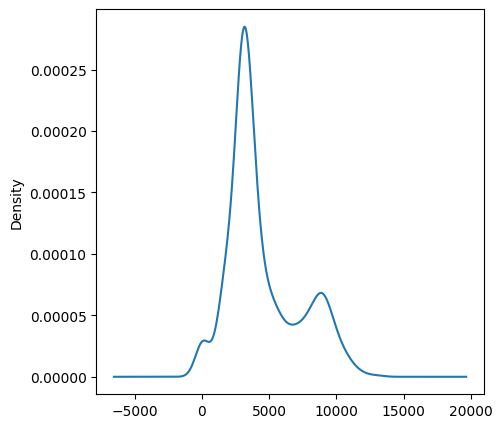

In [ ]:
df_inst['DAYS_ENTRY_PAYMENT'].value_counts().plot(kind='kde')

## CREDIT CARD BALANCE

In [ ]:
credit_card_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_card_balance.csv')
credit_card_balance.head()


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [ ]:

credit_card_balance.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

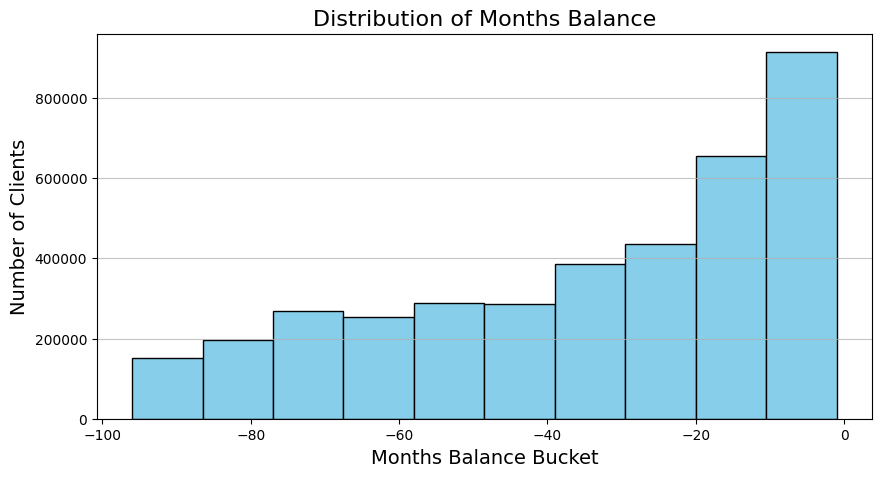

In [ ]:

## UNIVARIATE ANALYSIS

#### MONTH_BALANCE :

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Create histogram
plt.hist(credit_card_balance['MONTHS_BALANCE'].values, bins=10, edgecolor='black', color='skyblue')

# Add title and labels
plt.title('Distribution of Months Balance', fontsize=16)
plt.xlabel('Months Balance Bucket', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show plot
plt.show()




#### INFERENCES FOR THE ABOVE VISUALISATION:
###### New Application: Most clients have recent balances between 0 to -10 months from the application date, indicating active or recently closed credit accounts.

###### Fewer Long-Term Data: Fewer clients have balances older than 20 months, likely due to account closures or inactivity.

###### Data Recency Focus: The most relevant data for analysis is within the last 20 months, with a high density in the 0 to -10 months range.


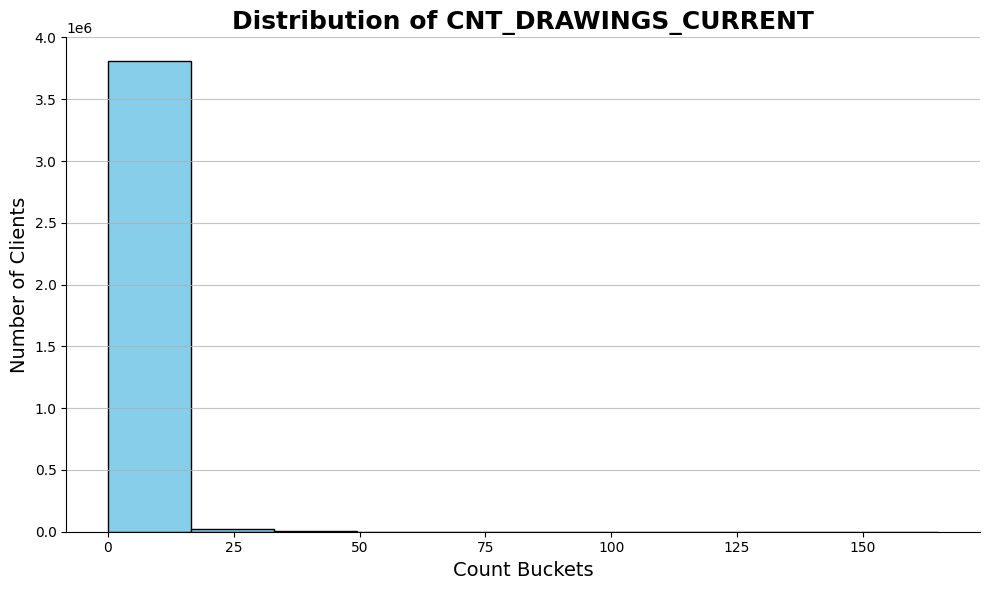

In [ ]:

#### CNT_DRAWINGS_CURRENT:

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(credit_card_balance['CNT_DRAWINGS_CURRENT'].values, bins=10, edgecolor='black', color='skyblue')

# Add title and labels with increased font sizes
plt.title('Distribution of CNT_DRAWINGS_CURRENT', fontsize=18, fontweight='bold')
plt.xlabel('Count Buckets', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)

# Add a box around the plot for better definition
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()




#### OBSERVATIONS:
###### Majority Low Usage: Most clients have fewer than 25 withdrawals in the current month on their credit accounts, indicating minimal drawing activity.

###### Rare Outliers: Only a small number of clients have high withdrawal counts, suggesting these are exceptions rather than the norm.


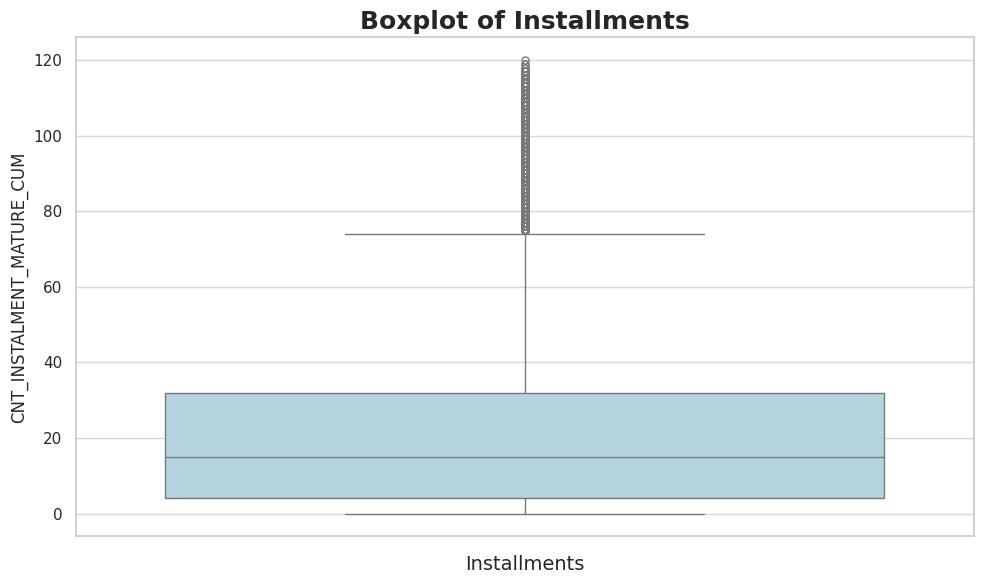

In [ ]:

#### CNT_INSTALMENT_MATURE_CUM :


# Set the style for the plot
sns.set(style='whitegrid')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='CNT_INSTALMENT_MATURE_CUM', data=credit_card_balance, color='lightblue', fliersize=5)

# Add title and labels with increased font sizes
plt.title('Boxplot of Installments', fontsize=18, fontweight='bold')
plt.xlabel('Installments', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()




#### OBSERVATIONS

###### Installment Distribution: Most clients have fewer than 32 paid installments, with 50% having 15 or fewer.
###### A few clients (outliers) have made up to 120 installments, but this is uncommon.

###### Key Takeaway: The bulk of clients have relatively few installments, indicating shorter credit histories or less reliance on installment-based repayments.



## BIVARIATE ANALYSIS

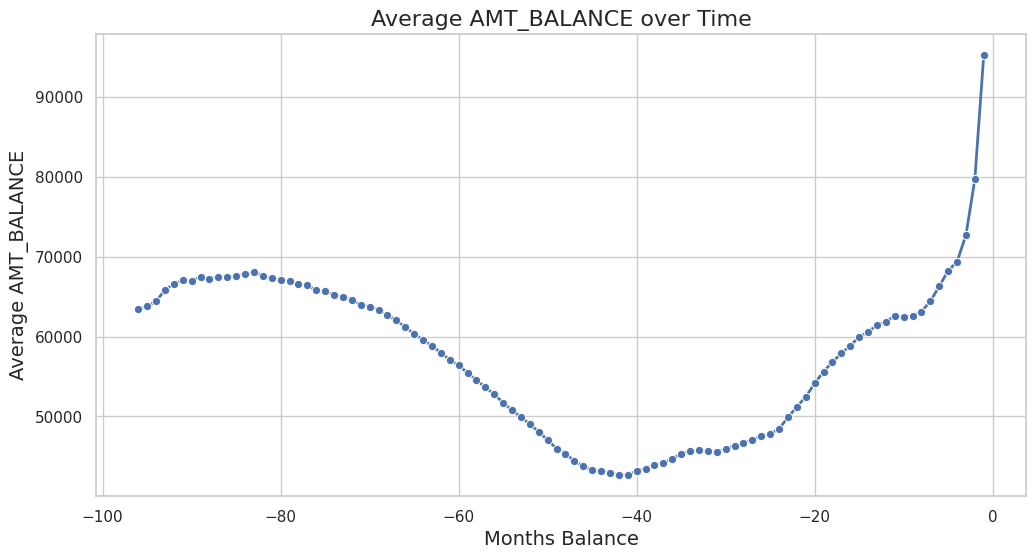

In [ ]:

# Line plot showing AMT_BALANCE over time
df_time = credit_card_balance.groupby('MONTHS_BALANCE')['AMT_BALANCE'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTHS_BALANCE', y='AMT_BALANCE', data=df_time, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Average AMT_BALANCE over Time', fontsize=16)
plt.xlabel('Months Balance', fontsize=14)
plt.ylabel('Average AMT_BALANCE', fontsize=14)
plt.grid(True)
plt.show()





#### OBSERVATIONS

###### Initial Decline (-100 to -60 months): Average balance starts above BHD 60,000 and steadily decreases, possibly due to active repayment or reduced spending.
###### Lowest Point (-40 to -20 months): Balances hit a low of around BHD 45,000, likely indicating debt clearance or minimal credit usage.
###### Recent Spike (Last 20 months): A sharp rise to over BHD 90,000 suggests increased spending or unpaid balances, reflecting greater credit reliance or financial strain.


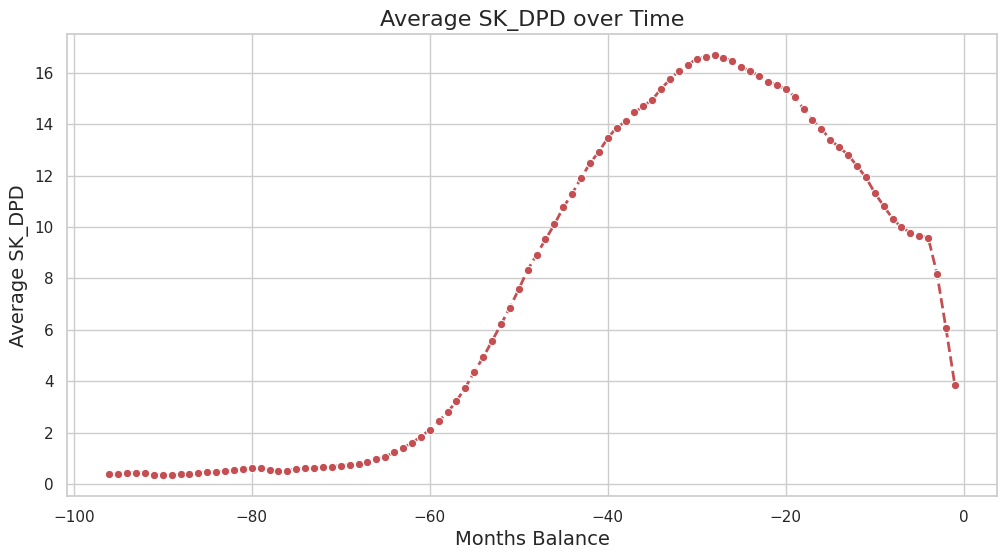

In [ ]:

# Line plot showing SK_DPD over time
df_dpd_time = credit_card_balance.groupby('MONTHS_BALANCE')['SK_DPD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTHS_BALANCE', y='SK_DPD', data=df_dpd_time, marker='o', color='r', linestyle='--', linewidth=2)
plt.title('Average SK_DPD over Time', fontsize=16)
plt.xlabel('Months Balance', fontsize=14)
plt.ylabel('Average SK_DPD', fontsize=14)
plt.grid(True)
plt.show()




#### OBSERVATIONS
###### Correlation: As AMT_BALANCE rises, SK_DPD (delinquencies) may increase, indicating repayment difficulties.
###### Minimal Delinquency (-40 to -20 months): During low balance periods, fewer overdue payments are expected.
###### Increase in Delinquencies (Recent months): As balances rise near the present, overdue payments likely increase, signaling financial stress.


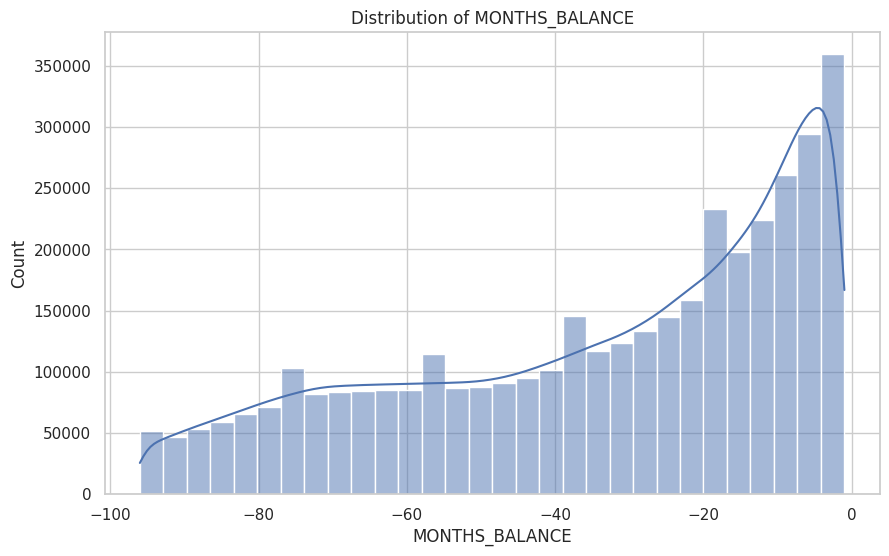

In [ ]:

# Histogram for MONTHS_BALANCE
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_balance['MONTHS_BALANCE'], bins=30, kde=True)
plt.title('Distribution of MONTHS_BALANCE')
plt.show()


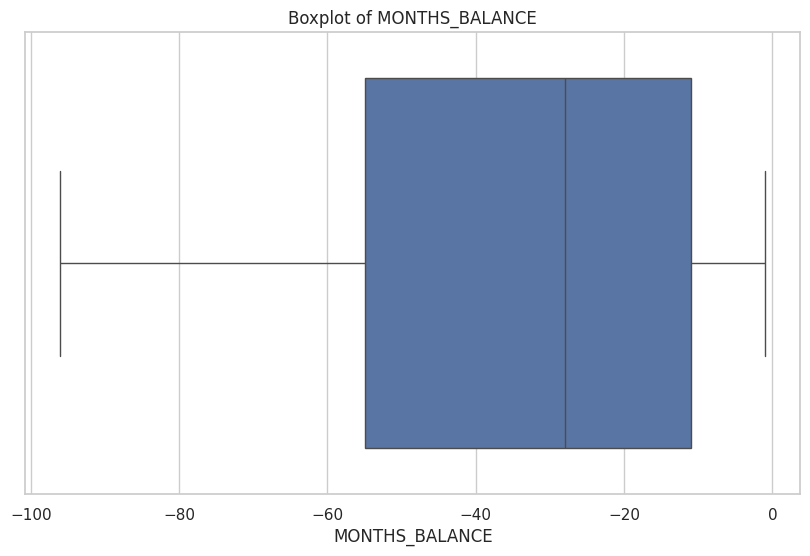

In [ ]:

# Boxplot for MONTHS_BALANCE
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_card_balance['MONTHS_BALANCE'])
plt.title('Boxplot of MONTHS_BALANCE')
plt.show()


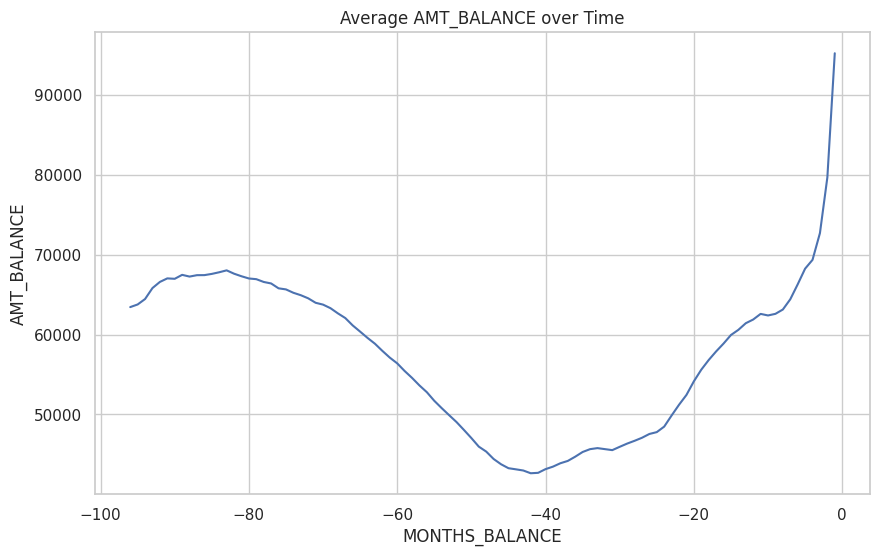

In [ ]:

# Line plot for MONTHS_BALANCE
df_time = credit_card_balance.groupby('MONTHS_BALANCE')['AMT_BALANCE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTHS_BALANCE', y='AMT_BALANCE', data=df_time)
plt.title('Average AMT_BALANCE over Time')
plt.show()


## Machine Learning Model Building

In [ ]:
df1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                   

In [ ]:
cat_cols=df1.select_dtypes(exclude=np.number).columns
cat_cols

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'INCOME_GROUP'],
      dtype='object')

In [ ]:
for i in cat_cols:
  print(df1[i].value_counts())
  print()

TARGET
0    282686
1     24825
Name: count, dtype: int64

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                

In [ ]:
df1["ORGANIZATION_TYPE"].nunique()

58

In [ ]:
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/new_file.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
# 1. Label Encoding for Ordinal Variables (if applicable)
# Assuming INCOME_GROUP is ordinal
income_order = ['Upto 1L', '1-2L', '2-5L', '5-10L', '10-20L', '20-50L', '50L above']
df1['INCOME_GROUP'] = pd.Categorical(df1['INCOME_GROUP'], categories=income_order, ordered=True).codes

# 2. One-Hot Encoding for Nominal Variables
# List of nominal variables to one-hot encode
nominal_vars = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
]

# Apply one-hot encoding
df1 = pd.get_dummies(df1, columns=nominal_vars, drop_first=True)

# Display the encoded DataFrame
df1.head()


SK_ID_CURR TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002      1             0          202500.0    406597.5      24700.5   
1      100003      0             0          270000.0   1293502.5      35698.5   
2      100004      0             0           67500.0    135000.0       6750.0   
3      100006      0             0          135000.0    312682.5      29686.5   
4      100007      0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801        9461            637   
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.262949   
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                         2                         2   
1      0.535276                         1                         0   
2      0.729567                         0                         0   
3      0.535276                         2                         0   
4      0.535276                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2    

In [ ]:
df1.shape

(307511, 174)

In [ ]:
bool_cols=df1.select_dtypes('bool').columns

In [ ]:
df1[bool_cols]=df1[bool_cols].astype('int')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 174 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: float64(10), int64(162), int8(1), object(1)
memory usage: 406.2+ MB


In [ ]:
df1.select_dtypes('object').columns

Index(['TARGET'], dtype='object')

In [ ]:
x=df1.drop(columns=['SK_ID_CURR','TARGET'])
y=df1['TARGET'].astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)


LogisticRegression()

In [ ]:
y_probs = model.predict_proba(xtest)[:, 1]

ROC-AUC: 0.6231


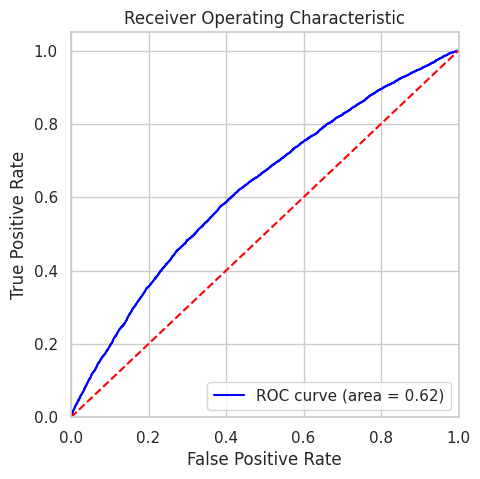

In [ ]:
roc_auc = roc_auc_score(ytest, y_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("GPU Available:", gpu_available)


GPU Available: []


In [ ]:
def plot_roc_auc(y_test, y_probs, model_name):
    """Function to plot ROC-AUC curve for a given model."""
    roc_auc = roc_auc_score(y_test, y_probs)
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

    return roc_auc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

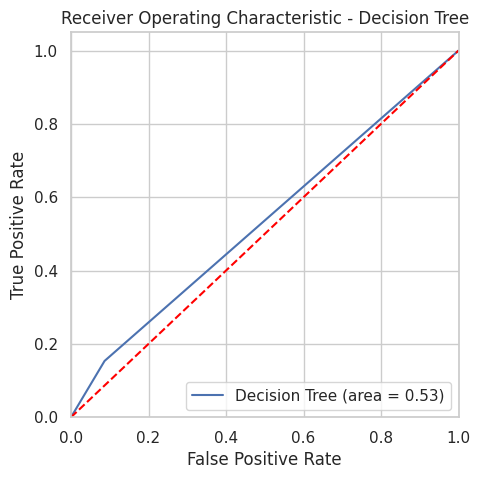

Decision Tree ROC-AUC: 0.5335


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

# Predict probabilities
dt_y_probs = dt_model.predict_proba(xtest)[:, 1]

# Plot ROC-AUC curve
dt_roc_auc = plot_roc_auc(ytest, dt_y_probs, 'Decision Tree')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()

print(f"Decision Tree ROC-AUC: {dt_roc_auc:.4f}")

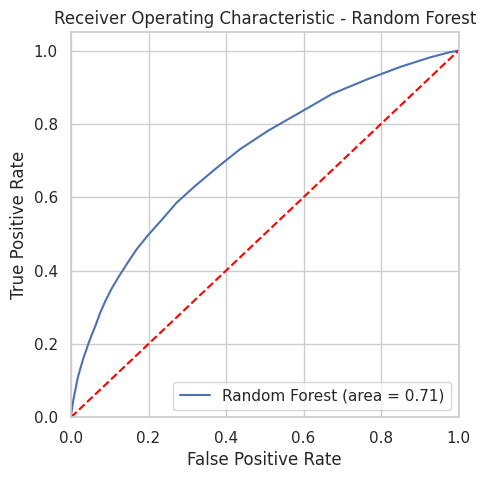

Random Forest ROC-AUC: 0.7114


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

# Predict probabilities
rf_y_probs = rf_model.predict_proba(xtest)[:, 1]

# Plot ROC-AUC curve
rf_roc_auc = plot_roc_auc(ytest, rf_y_probs, 'Random Forest')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")

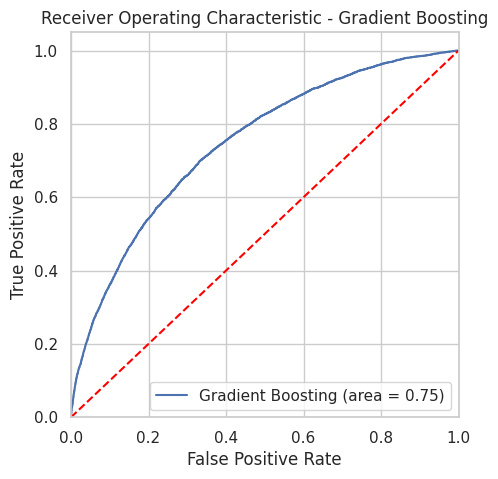

Gradient Boosting ROC-AUC: 0.7461


In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(xtrain, ytrain)

# Predict probabilities
gb_y_probs = gb_model.predict_proba(xtest)[:, 1]

# Plot ROC-AUC curve
gb_roc_auc = plot_roc_auc(ytest, gb_y_probs, 'Gradient Boosting')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

print(f"Gradient Boosting ROC-AUC: {gb_roc_auc:.4f}")

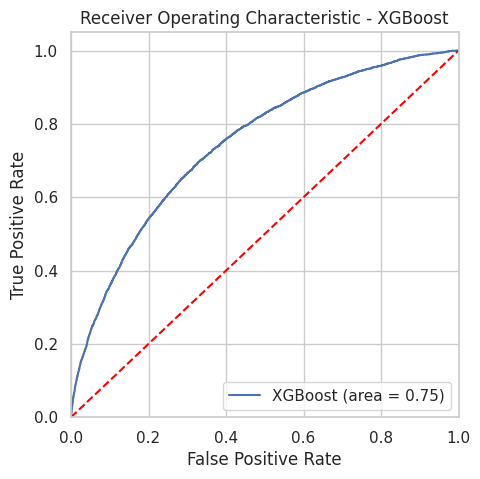

XGBoost ROC-AUC: 0.7464


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')
xgb_model.fit(xtrain, ytrain)

# Predict probabilities
xgb_y_probs = xgb_model.predict_proba(xtest)[:, 1]

# Plot ROC-AUC curve
xgb_roc_auc = plot_roc_auc(ytest, xgb_y_probs, 'XGBoost')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.show()

print(f"XGBoost ROC-AUC: {xgb_roc_auc:.4f}")

In [ ]:
# Get feature importance
importance = xgb_model.feature_importances_


feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [ ]:
importance_df.head(10)

Feature  Importance
27                                        EXT_SOURCE_3    0.033765
26                                        EXT_SOURCE_2    0.029844
77                NAME_EDUCATION_TYPE_Higher education    0.022143
61                                       CODE_GENDER_M    0.020853
171                              ORGANIZATION_TYPE_XNA    0.015016
34                                     FLAG_DOCUMENT_3    0.014456
62                                      FLAG_OWN_CAR_Y    0.013610
80   NAME_EDUCATION_TYPE_Secondary / secondary special    0.013353
18                         REGION_RATING_CLIENT_W_CITY    0.012804
23                              REG_CITY_NOT_LIVE_CITY    0.011940

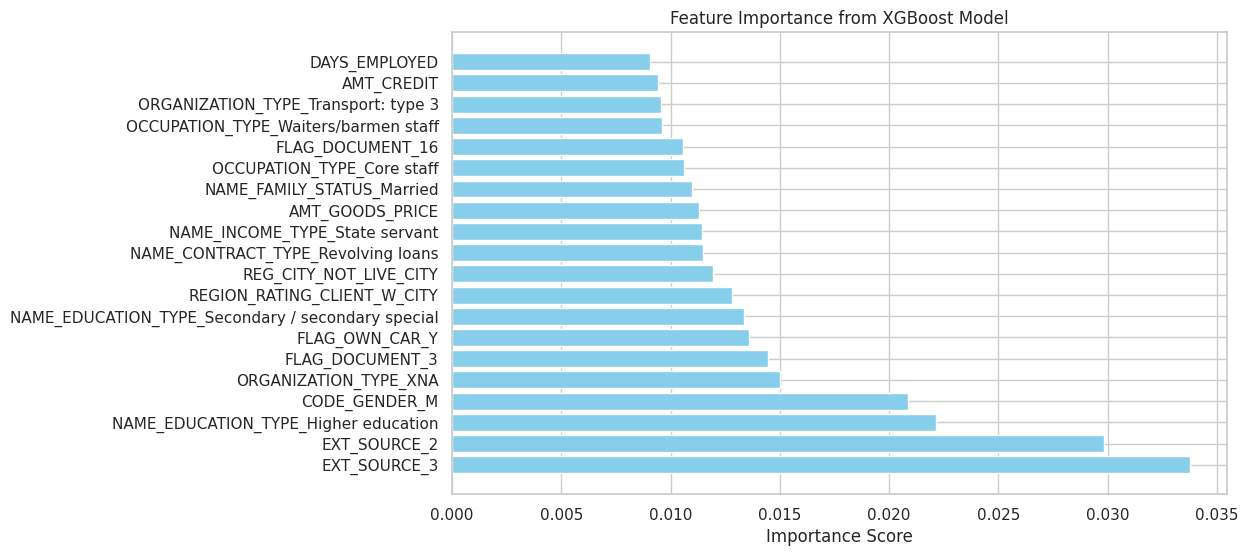

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(20)['Feature'], importance_df.head(20)['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Model')
plt.show()

In [ ]:
# RF feature importance
importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_rf = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
importance_rf = importance_df.sort_values(by='Importance', ascending=False)


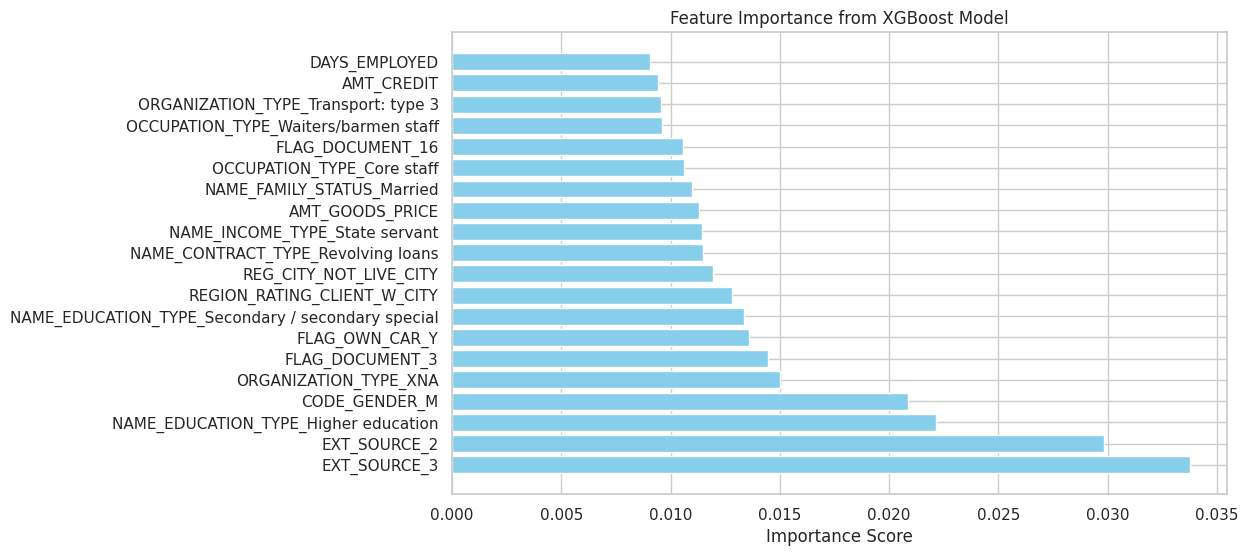

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_rf.head(20)['Feature'], importance_rf.head(20)['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Model')
plt.show()

In [ ]:
importance_df

Feature  Importance
27                                        EXT_SOURCE_3    0.033765
26                                        EXT_SOURCE_2    0.029844
77                NAME_EDUCATION_TYPE_Higher education    0.022143
61                                       CODE_GENDER_M    0.020853
171                              ORGANIZATION_TYPE_XNA    0.015016
34                                     FLAG_DOCUMENT_3    0.014456
62                                      FLAG_OWN_CAR_Y    0.013610
80   NAME_EDUCATION_TYPE_Secondary / secondary special    0.013353
18                         REGION_RATING_CLIENT_W_CITY    0.012804
23                              REG_CITY_NOT_LIVE_CITY    0.011940
60                  NAME_CONTRACT_TYPE_Revolving loans    0.011498
73                      NAME_INCOME_TYPE_State servant    0.011452
4                                      AMT_GOODS_PRICE    0.011307
81                          NAME_FAMILY_STATUS_Married    0.010995
93                          OCCUPATION_TYPE_Core staff    0.010619
47                                    FLAG_DOCUMENT_16    0.010587
108               OCCUPATION_TYPE_Waiters/barmen staff    0.009614
168                ORGANIZATION_TYPE_Transport: type 3    0.009559
2                                           AMT_CREDIT    0.009426
7                                        DAYS_EMPLOYED    0.009078
3                                          AMT_ANNUITY    0.008950
12                                     FLAG_WORK_PHONE    0.008747
103                      OCCUPATION_TYPE_Realty agents    0.008679
115                      ORGANIZATION_TYPE_Agriculture    0.008340
169                ORGANIZATION_TYPE_Transport: type 4    0.008308
49                                    FLAG_DOCUMENT_18    0.008234
20                          REG_REGION_NOT_LIVE_REGION    0.008205
140                 ORGANIZATION_TYPE_Industry: type 9    0.008177
29                            DEF_30_CNT_SOCIAL_CIRCLE    0.008107
156                    ORGANIZATION_TYPE_Self-employed    0.007980
149                           ORGANIZATION_TYPE_Postal    0.007949
76                            NAME_INCOME_TYPE_Working    0.007817
145                         ORGANIZATION_TYPE_Military    0.007609
6                                           DAYS_BIRTH    0.007555
31                            DEF_60_CNT_SOCIAL_CIRCLE    0.007541
40                                     FLAG_DOCUMENT_9    0.007477
148                           ORGANIZATION_TYPE_Police    0.007397
120                         ORGANIZATION_TYPE_Cleaning    0.007323
160                    ORGANIZATION_TYPE_Trade: type 2    0.007253
121                     ORGANIZATION_TYPE_Construction    0.007186
24                              REG_CITY_NOT_WORK_CITY    0.007172
99                  OCCUPATION_TYPE_Low-skill Laborers    0.007109
152                       ORGANIZATION_TYPE_Restaurant    0.007056
57                           AMT_REQ_CREDIT_BUREAU_QRT    0.006858
153                           ORGANIZATION_TYPE_School    0.006831
67                             NAME_TYPE_SUITE_Other_B    0.006812
104                        OCCUPATION_TYPE_Sales staff    0.006778
54                           AMT_REQ_CREDIT_BUREAU_DAY    0.006760
83             NAME_FAMILY_STATUS_Single / not married    0.006680
17                                REGION_RATING_CLIENT    0.006662
159                    ORGANIZATION_TYPE_Trade: type 1    0.006620
44                                    FLAG_DOCUMENT_13    0.006583
98                            OCCUPATION_TYPE_Laborers    0.006520
11                                      FLAG_EMP_PHONE    0.006488
79                 NAME_EDUCATION_TYPE_Lower secondary    0.006464
14                                          FLAG_PHONE    0.006338
78               NAME_EDUCATION_TYPE_Incomplete higher    0.006337
161                    ORGANIZATION_TYPE_Trade: type 3    0.006337
9                                      DAYS_ID_PUBLISH    0.006296
165                    ORGA

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data


KeyboardInterrupt: 

In [ ]:
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/df1.csv',index=False)